<a href="https://colab.research.google.com/github/T-art-coder/Python-notebooks/blob/main/%D0%9F%D0%BE%D0%BB%D0%B8%D1%82%D0%B5%D1%85_UNSW_15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
    
<h1 style="padding: 8px;color:white; display:fill;background-color:#555555; border-radius:5px; font-size:150%"><b> Table of contents </b></h1>

 - [**Introduction**](#1)

 - [**Import and Set Up**](#2)

 - [**Pre-processing and feature selection**](#3)
    
 - [**Modelling and Evaluation**](#4)
    - [**Logistical Classification**](#4_1)
    - [**kNN**](#4_2)
    - [**Decision Tree**](#4_3)
    - [**Extra Trees**](#4_4)
    - [**Random Forest**](#4_5)
    - [**Gradient Boosting Classifier**](#4_6)
    - [**Neural Network MLP**](#4_7)
    - [**Neural Network MLP (Keras)**](#4_8)
    - [**GRU (Keras)**](#4_9)
    - [**LSTM (Keras)**](#4_10)
    
 - [**Evaluate**](#5)
   

<a id='1'></a>
# <p style="padding: 8px;color:white; display:fill;background-color:#555555; border-radius:5px; font-size:100%"> <b>Introduction</b>

<a id='2'></a>
# <p style="padding: 8px;color:white; display:fill;background-color:#555555; border-radius:5px; font-size:100%"> <b>Import and Set up</b>

In [ ]:
import datetime
import numpy as np
import pandas as pd

from IPython.core.display import display, HTML
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio


import seaborn as sns
from importlib import reload
import matplotlib.pyplot as plt
import matplotlib
import warnings

# Configure Jupyter Notebook
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 500)
pd.set_option('display.expand_frame_repr', False)
# pd.set_option('max_colwidth', -1)
display(HTML("<style>div.output_scroll { height: 35em; }</style>"))

reload(plt)
%matplotlib inline
%config InlineBackend.figure_format ='retina'

warnings.filterwarnings('ignore')

# configure plotly graph objects
pio.renderers.default = 'iframe'
# pio.renderers.default = 'vscode'

pio.templates["ck_template"] = go.layout.Template(
    layout_colorway = px.colors.sequential.Viridis,
#     layout_hovermode = 'closest',
#     layout_hoverdistance = -1,
    layout_autosize=False,
    layout_width=800,
    layout_height=600,
    layout_font = dict(family="Calibri Light"),
    layout_title_font = dict(family="Calibri"),
    layout_hoverlabel_font = dict(family="Calibri Light"),
#     plot_bgcolor="white",
)

# pio.templates.default = 'seaborn+ck_template+gridon'
pio.templates.default = 'ck_template+gridon'
# pio.templates.default = 'seaborn+gridon'
# pio.templates

In [ ]:
NB15_1 = pd.read_csv('/content/UNSW-NB15_1.csv', header = None)
#NB15_2 = pd.read_csv('/content/UNSW-NB15_2.csv', header = None)
#NB15_3 = pd.read_csv('/content/UNSW-NB15_3.csv', header = None)
#NB15_4 = pd.read_csv('/content/UNSW-NB15_4.csv', header = None)

In [ ]:
NB15_features = pd.read_csv('/content/NUSW-NB15_features.csv', encoding='cp1252')
NB15_features['Name'] = NB15_features['Name'].astype(str).str.lower()
NB15_features

,No.,Name,Type,Description
0,1,srcip,nominal,Source IP address
1,2,sport,integer,Source port number
2,3,dstip,nominal,Destination IP address
3,4,dsport,integer,Destination port number
4,5,proto,nominal,Transaction protocol
5,6,state,nominal,Indicates to the state and its dependent proto...
6,7,dur,Float,Record total duration
7,8,sbytes,Integer,Source to destination transaction bytes
8,9,dbytes,Integer,Destination to source transaction bytes
9,10,sttl,Integer,Source to destination time to live value


In [ ]:
NB15_1.columns = NB15_features['Name']
NB15_1.columns = NB15_features['Name']
df = NB15_1
df.head(3)

Name,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,service,sload,dload,spkts,dpkts,swin,dwin,stcpb,dtcpb,smeansz,dmeansz,trans_depth,res_bdy_len,sjit,djit,stime,ltime,sintpkt,dintpkt,tcprtt,synack,ackdat,is_sm_ips_ports,ct_state_ttl,ct_flw_http_mthd,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,label
0,59.166.0.0,1390,149.171.126.6,53,udp,CON,0.001055,132,164,31,29,0,0,dns,500473.93750,621800.93750,2,2,0,0,0,0,66,82,0,0,0.00000,0.000000,1421927414,1421927414,0.017,0.013000,0.0,0.0,0.0,0,0,0,0,0,3,7,1,3,1,1,1,NaN,0
1,59.166.0.0,33661,149.171.126.9,1024,udp,CON,0.036133,528,304,31,29,0,0,-,87676.08594,50480.17188,4,4,0,0,0,0,132,76,0,0,9.89101,10.682733,1421927414,1421927414,7.005,7.564333,0.0,0.0,0.0,0,0,0,0,0,2,4,2,3,1,1,2,NaN,0
2,59.166.0.6,1464,149.171.126.7,53,udp,CON,0.001119,146,178,31,29,0,0,dns,521894.53130,636282.37500,2,2,0,0,0,0,73,89,0,0,0.00000,0.000000,1421927414,1421927414,0.017,0.013000,0.0,0.0,0.0,0,0,0,0,0,12,8,1,2,2,1,1,NaN,0


In [ ]:
NB15_1.columns = NB15_features['Name']
NB15_2.columns = NB15_features['Name']
NB15_3.columns = NB15_features['Name']
NB15_4.columns = NB15_features['Name']

df = pd.concat([NB15_1, NB15_2, NB15_3, NB15_4], ignore_index=True)

In [ ]:
#df = pd.read_csv('/content/UNSW_NB15_testing-set.csv')
pd.read_csv('/content/UNSW_NB15_testing-set.csv')

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,252,254,1.415894e+04,8495.365234,0,0,24.295600,8.375000,30.177547,11.830604,255,621772692,2202533631,255,0.000000,0.000000,0.000000,43,43,0,0,1,0,1,1,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,62,252,8.395112e+03,503571.312500,2,17,49.915000,15.432865,61.426934,1387.778330,255,1417884146,3077387971,255,0.000000,0.000000,0.000000,52,1106,0,0,43,1,1,1,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,62,252,1.572272e+03,60929.230470,1,6,231.875571,102.737203,17179.586860,11420.926230,255,2116150707,2963114973,255,0.111897,0.061458,0.050439,46,824,0,0,7,1,2,1,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,62,252,2.740179e+03,3358.622070,1,3,152.876547,90.235726,259.080172,4991.784669,255,1107119177,1047442890,255,0.000000,0.000000,0.000000,52,64,0,0,1,1,2,1,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,254,252,8.561499e+03,3987.059814,2,1,47.750333,75.659602,2415.837634,115.807000,255,2436137549,1977154190,255,0.128381,0.071147,0.057234,53,45,0,0,43,1,2,2,1,40,0,0,0,2,39,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175336,175337,0.000009,udp,dns,INT,2,0,114,0,111111.107200,254,0,5.066666e+07,0.000000,0,0,0.009000,0.000000,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,57,0,0,0,24,2,24,24,13,24,0,0,0,24,24,0,Generic,1
175337,175338,0.505762,tcp,-,FIN,10,8,620,354,33.612649,254,252,8.826286e+03,4903.492188,2,1,54.400111,66.980570,3721.068786,120.177727,255,3518776216,3453092386,255,0.099440,0.036895,0.062545,62,44,0,0,1,1,1,1,1,2,0,0,0,1,1,0,Shellcode,1
175338,175339,0.000009,udp,dns,INT,2,0,114,0,111111.107200,254,0,5.066666e+07,0.000000,0,0,0.009000,0.000000,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,57,0,0,0,12,2,3,3,3,13,0,0,0,3,12,0,Generic,1
175339,175340,0.000009,udp,dns,INT,2,0,114,0,111111.107200,254,0,5.066666e+07,0.000000,0,0,0.009000,0.000000,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,57,0,0,0,30,2,30,30,14,30,0,0,0,30,30,0,Generic,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2540047 entries, 0 to 2540046
Data columns (total 49 columns):
 #   Column            Dtype  
---  ------            -----  
 0   srcip             object 
 1   sport             object 
 2   dstip             object 
 3   dsport            object 
 4   proto             object 
 5   state             object 
 6   dur               float64
 7   sbytes            int64  
 8   dbytes            int64  
 9   sttl              int64  
 10  dttl              int64  
 11  sloss             int64  
 12  dloss             int64  
 13  service           object 
 14  Sload             float64
 15  Dload             float64
 16  Spkts             int64  
 17  Dpkts             int64  
 18  swin              int64  
 19  dwin              int64  
 20  stcpb             int64  
 21  dtcpb             int64  
 22  smeansz           int64  
 23  dmeansz           int64  
 24  trans_depth       int64  
 25  res_bdy_len       int64  
 26  Sjit          

In [ ]:
df.head(10)

Name,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,service,Sload,Dload,Spkts,Dpkts,swin,dwin,stcpb,dtcpb,smeansz,dmeansz,trans_depth,res_bdy_len,Sjit,Djit,Stime,Ltime,Sintpkt,Dintpkt,tcprtt,synack,ackdat,is_sm_ips_ports,ct_state_ttl,ct_flw_http_mthd,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,Label
0,59.166.0.0,1390,149.171.126.6,53,udp,CON,0.001055,132,164,31,29,0,0,dns,500473.93750,621800.93750,2,2,0,0,0,0,66,82,0,0,0.000000,0.000000,1421927414,1421927414,0.017,0.013000,0.0,0.0,0.0,0,0,0.0,0.0,0,3,7,1,3,1,1,1,NaN,0
1,59.166.0.0,33661,149.171.126.9,1024,udp,CON,0.036133,528,304,31,29,0,0,-,87676.08594,50480.17188,4,4,0,0,0,0,132,76,0,0,9.891010,10.682733,1421927414,1421927414,7.005,7.564333,0.0,0.0,0.0,0,0,0.0,0.0,0,2,4,2,3,1,1,2,NaN,0
2,59.166.0.6,1464,149.171.126.7,53,udp,CON,0.001119,146,178,31,29,0,0,dns,521894.53130,636282.37500,2,2,0,0,0,0,73,89,0,0,0.000000,0.000000,1421927414,1421927414,0.017,0.013000,0.0,0.0,0.0,0,0,0.0,0.0,0,12,8,1,2,2,1,1,NaN,0
3,59.166.0.5,3593,149.171.126.5,53,udp,CON,0.001209,132,164,31,29,0,0,dns,436724.56250,542597.18750,2,2,0,0,0,0,66,82,0,0,0.000000,0.000000,1421927414,1421927414,0.043,0.014000,0.0,0.0,0.0,0,0,0.0,0.0,0,6,9,1,1,1,1,1,NaN,0
4,59.166.0.3,49664,149.171.126.0,53,udp,CON,0.001169,146,178,31,29,0,0,dns,499572.25000,609067.56250,2,2,0,0,0,0,73,89,0,0,0.000000,0.000000,1421927414,1421927414,0.005,0.003000,0.0,0.0,0.0,0,0,0.0,0.0,0,7,9,1,1,1,1,1,NaN,0
5,59.166.0.0,32119,149.171.126.9,111,udp,CON,0.078339,568,312,31,29,0,0,-,43503.23438,23896.14258,4,4,0,0,0,0,142,78,0,0,29.682221,34.370340,1421927414,1421927414,21.003,24.315000,0.0,0.0,0.0,0,0,0.0,0.0,0,2,4,2,3,1,1,2,NaN,0
6,59.166.0.6,2142,149.171.126.4,53,udp,CON,0.001134,132,164,31,29,0,0,dns,465608.46880,578483.25000,2,2,0,0,0,0,66,82,0,0,0.000000,0.000000,1421927414,1421927414,0.017,0.013000,0.0,0.0,0.0,0,0,0.0,0.0,0,12,7,1,2,2,1,1,NaN,0
7,10.40.182.3,0,10.40.182.3,0,arp,INT,0.000000,46,0,0,0,0,0,-,0.00000,0.00000,1,0,0,0,0,0,46,0,0,0,0.000000,0.000000,1421927415,1421927415,0.000,0.000000,0.0,0.0,0.0,1,2,0.0,0.0,0,2,2,2,2,2,2,2,NaN,0
8,59.166.0.5,40726,149.171.126.6,53,udp,CON,0.001126,146,178,31,29,0,0,dns,518650.09380,632326.81250,2,2,0,0,0,0,73,89,0,0,0.000000,0.000000,1421927415,1421927415,0.018,0.013000,0.0,0.0,0.0,0,0,0.0,0.0,0,6,7,3,1,1,1,1,NaN,0
9,59.166.0.7,12660,149.171.126.4,53,udp,CON,0.001167,132,164,31,29,0,0,dns,452442.15630,562125.06250,2,2,0,0,0,0,66,82,0,0,0.000000,0.000000,1421927415,1421927415,0.018,0.013000,0.0,0.0,0.0,0,0,0.0,0.0,0,6,7,2,1,1,1,1,NaN,0


In [ ]:
df.describe(include='all')

Name,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,service,Sload,Dload,Spkts,Dpkts,swin,dwin,stcpb,dtcpb,smeansz,dmeansz,trans_depth,res_bdy_len,Sjit,Djit,Stime,Ltime,Sintpkt,Dintpkt,tcprtt,synack,ackdat,is_sm_ips_ports,ct_state_ttl,ct_flw_http_mthd,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,Label
count,2540047,2540047.0,2540047,2540047,2540047,2540047,2.540047e+06,2.540047e+06,2.540047e+06,2.540047e+06,2.540047e+06,2.540047e+06,2.540047e+06,2540047,2.540047e+06,2.540047e+06,2.540047e+06,2.540047e+06,2.540047e+06,2.540047e+06,2.540047e+06,2.540047e+06,2.540047e+06,2.540047e+06,2.540047e+06,2.540047e+06,2.540047e+06,2.540047e+06,2.540047e+06,2.540047e+06,2.540047e+06,2.540047e+06,2.540047e+06,2.540047e+06,2.540047e+06,2.540047e+06,2.540047e+06,1.191902e+06,1.110168e+06,2540047,2.540047e+06,2.540047e+06,2.540047e+06,2.540047e+06,2.540047e+06,2.540047e+06,2.540047e+06,321283,2.540047e+06
unique,43,100341.0,47,128297,135,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,NaN
top,59.166.0.4,1043.0,149.171.126.3,53,tcp,FIN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Generic,NaN
freq,197959,216289.0,197771,619538,1495074,1478689,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1246397,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1429879,NaN,NaN,NaN,NaN,NaN,NaN,NaN,215481,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,6.587916e-01,4.339600e+03,3.642759e+04,6.278197e+01,3.076681e+01,5.163921e+00,1.632944e+01,NaN,3.695645e+07,2.450861e+06,3.328884e+01,4.272664e+01,1.500887e+02,1.497459e+02,1.261701e+09,1.261766e+09,1.242536e+02,2.766719e+02,8.325318e-02,4.242118e+03,1.589037e+03,7.300755e+02,1.423261e+09,1.423261e+09,1.933225e+02,7.882476e+01,6.180475e-03,3.287595e-03,2.892880e-03,1.651544e-03,2.611546e-01,2.345856e-01,3.969940e-02,NaN,9.206988e+00,8.988958e+00,6.439103e+00,6.900986e+00,4.642139e+00,3.592729e+00,6.845886e+00,NaN,1.264870e-01
std,NaN,NaN,NaN,NaN,NaN,NaN,1.392493e+01,5.640599e+04,1.610960e+05,7.462277e+01,4.285089e+01,2.251707e+01,5.659474e+01,NaN,1.186043e+08,4.224863e+06,7.628388e+01,1.215020e+02,1.254824e+02,1.255438e+02,1.422027e+09,1.422139e+09,1.519162e+02,3.356166e+02,3.500045e-01,4.750053e+04,1.691036e+04,3.438558e+03,1.134449e+06,1.134448e+06,2.779163e+03,1.433191e+03,4.615863e-02,2.593570e-02,2.394668e-02,4.060563e-02,6.830974e-01,7.940924e-01,1.996589e-01,NaN,1.083676e+01,1.082249e+01,8.162034e+00,8.205062e+00,8.477579e+00,6.174445e+00,1.125828e+01,NaN,3.323975e-01
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.421927e+09,1.421927e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,NaN,0.000000e+00
25%,NaN,NaN,NaN,NaN,NaN,NaN,1.037000e-03,2.000000e+02,1.780000e+02,3.100000e+01,2.900000e+01,0.000000e+00,0.000000e+00,NaN,1.353963e+05,1.191594e+04,2.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.000000e+01,6.900000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.421952e+09,1.421952e+09,9.000000e-03,6.000000e-03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,NaN,0.000000e+00
50%,NaN,NaN,NaN,NaN,NaN,NaN,1.586100e-02,1.470000e+03,1.820000e+03,3.100000e+01,2.90000

In [ ]:
print("Размерность датасета: ",df.shape)

Размерность датасета:  (640791, 49)


<a id='3'></a>
# <p style="padding: 8px;color:white; display:fill;background-color:#555555; border-radius:5px; font-size:100%"> <b>Предобработка данных</b>

In [ ]:
# в train нет дубликатов, в 1-4 есть аж 460 тысяч(!)
print("Duplicates in train_df: ", df.duplicated().sum())

df = df.drop_duplicates()

Duplicates in train_df:  59210


In [ ]:
# возьмем пока 20% датасета, т.к. не хватает ОЗУ

df = df.sample(frac=0.2, random_state=42) # Sample 20% of the DataFrame

## Исключение маловажных или излишних фичей

Сначала дропнем id, т.к. она носит номинальный характер.

Далее дропнем 'attack_cat'. (в будущем можно попробовать все таки сделать SVM+что-то еще)

In [ ]:
list_drop = ['attack_cat']
#list_drop = ['id','attack_cat'] # id нет в 4-х файлах
df.drop(list_drop,axis=1,inplace=True)

In [ ]:
missing_data = df.isnull().sum().to_frame().rename(columns={0:"Total No. of Missing Values"})
missing_data["% of Missing Values"] = round((missing_data["Total No. of Missing Values"]/len(df))*100,2)
missing_data

,Total No. of Missing Values,% of Missing Values
Name,,
srcip,0,0.0
sport,0,0.0
dstip,0,0.0
dsport,0,0.0
proto,0,0.0
state,0,0.0
dur,0,0.0
sbytes,0,0.0
dbytes,0,0.0


In [ ]:
# Отсутствующие значения означают, что в некоторых случаях не было потоков с методами HTTP, поэтому мы заменим NAN на 0
df['ct_flw_http_mthd'].fillna(0, inplace=True)

# is_ftp_login имеет тип binary, что означает, что он принимает 1 (пользователь вошел в систему) или 0 (или нет), поэтому лучшим подходом будет заменить nan на 0.
df['is_ftp_login'].fillna(0, inplace=True)

### Проведем EDA

In [ ]:
## категориальные признаки
df.describe(include="O").T

,count,unique,top,freq
Name,,,,
srcip,700001,40,59.166.0.2,67209
sport,700001,100270,0,6056
dstip,700001,44,149.171.126.4,67331
dsport,700001,87819,53,107485
proto,700001,135,tcp,494737
state,700001,16,FIN,487911
service,700001,13,-,430656


In [ ]:
cols = df.columns

for column in cols:
    print('Unique values of ',column , 'with dtype',df[column].dtype, 'have total values',df[column].nunique(),'->',  df[column].unique())
    print('-'*100)

Unique values of  srcip with dtype object have total values 36 -> ['59.166.0.1' '59.166.0.2' '59.166.0.8' '59.166.0.6' '59.166.0.7'
 '59.166.0.4' '175.45.176.2' '59.166.0.5' '59.166.0.9' '59.166.0.0'
 '59.166.0.3' '175.45.176.3' '10.40.182.1' '175.45.176.1' '149.171.126.6'
 '175.45.176.0' '149.171.126.18' '149.171.126.5' '10.40.85.1'
 '10.40.170.2' '10.40.85.30' '192.168.241.243' '149.171.126.7'
 '149.171.126.0' '149.171.126.1' '149.171.126.4' '149.171.126.3'
 '10.40.182.3' '149.171.126.15' '149.171.126.2' '149.171.126.8'
 '149.171.126.9' '149.171.126.12' '149.171.126.11' '149.171.126.16'
 '149.171.126.10']
----------------------------------------------------------------------------------------------------
Unique values of  sport with dtype object have total values 63273 -> [63101 '15519' 32506 ... '27739' '51934' 27285]
----------------------------------------------------------------------------------------------------
Unique values of  dstip with dtype object have total values 41 -> 

## Apply Clamping

The extreme values should be pruned to reduce the skewness of some distributions. The logic applied here is that the features with a maximum value more than ten times the median value is pruned to the 95th percentile. If the 95th percentile is close to the maximum, then the tail has more interesting information than what we want to discard.

The clamping is also only applied to features with a maximum of more than 10 times the median. This prevents the bimodals and small value distributions from being excessively pruned.  

In [ ]:
# Clamp extreme Values
df_numeric = df.select_dtypes(include=[np.number])
df_numeric.describe(include='all')

Name,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,sload,dload,spkts,dpkts,swin,dwin,stcpb,dtcpb,smeansz,dmeansz,trans_depth,res_bdy_len,sjit,djit,stime,ltime,sintpkt,dintpkt,tcprtt,synack,ackdat,is_sm_ips_ports,ct_state_ttl,ct_flw_http_mthd,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,label
count,128158.000000,1.281580e+05,1.281580e+05,128158.000000,128158.000000,128158.000000,128158.000000,1.281580e+05,1.281580e+05,128158.000000,128158.000000,128158.000000,128158.00000,1.281580e+05,1.281580e+05,128158.000000,128158.000000,128158.00000,128158.000000,1.281580e+05,128158.000000,1.281580e+05,1.281580e+05,128158.000000,128158.000000,128158.000000,128158.000000,128158.000000,128158.000000,128158.000000,128158.000000,128158.000000,128158.000000,128158.000000,128158.000000,128158.000000,128158.000000,128158.000000,128158.000000,128158.000000,128158.000000
mean,0.685757,4.923950e+03,4.448446e+04,36.481086,32.595382,6.167333,19.889933,3.921780e+06,3.074165e+06,39.985916,52.158640,182.058779,181.80375,1.526626e+09,1.527901e+09,130.370285,345.090131,0.09436,5416.012391,1.561508e+03,920.104614,1.421941e+09,1.421941e+09,157.580945,70.394271,0.003558,0.001977,0.001581,0.001241,0.048269,0.143237,0.016542,0.019624,5.944920,5.633367,3.689524,4.159038,1.410735,1.149932,1.891337,0.022082
std,24.637827,4.728017e+04,1.721182e+05,34.220281,30.459694,19.205210,59.768109,4.185231e+07,4.542105e+06,76.072444,127.994235,115.235968,115.35795,1.425548e+09,1.426522e+09,164.081877,340.779673,0.30287,51688.222125,1.082903e+04,4496.008994,8.063978e+03,8.064079e+03,2456.014719,1338.676685,0.027958,0.015234,0.014628,0.035201,0.309616,0.675012,0.127548,0.178593,4.576112,4.189412,2.828717,3.223712,1.242603,0.731171,1.595289,0.146951
min,0.000000,2.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,1.000000,0.000000,0.000000,0.00000,0.000000e+00,0.000000e+00,24.000000,0.000000,0.00000,0.000000,0.000000e+00,0.000000,1.421927e+09,1.421927e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,0.004184,5.120000e+02,3.040000e+02,31.000000,29.000000,0.000000,0.000000,8.561310e+04,9.132188e+04,4.000000,4.000000,0.000000,0.00000,0.000000e+00,0.000000e+00,62.000000,82.000000,0.00000,0.000000,0.000000e+00,0.346762,1.421934e+09,1.421934e+09,0.290882,0.241000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,0.000000
50%,0.027089,2.048000e+03,3.380000e+03,31.000000,29.000000,4.000000,5.000000,5.357798e+05,6.736045e+05,16.000000,18.000000,255.000000,255.00000,1.278674e+09,1.275862e+09,73.000000,125.000000,0.00000,0.000000,3.019662e+01,19.549847,1.421941e+09,1.421941e+09,0.743135,0.707550,0.000659,0.000520,0.000133,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,5.000000,3.000000,3.000000,1.000000,1.000000,1.000000,0.000000
75%,0.330193,3.806000e+03,2.173000e+04,31.000000,29.000000,7.000000,16.000000,1.048978e+06,3.907349e+06,50.000000,48.000000,255.000000,255.00000,2.777146e+09,2.776696e+09,128.000000,565.000000,0.00000,0.000000,7.258581e+02,83.222711,1.421948e+09,1.421948e+09,11.639371,10.334717,0.000725,0.000570,0.000152,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,8.000000,5.000000,5.000000,1.000000,1.000000,2.000000,0.000000
max,8760.777344,1.163118e+07,5.097505e+06,255.000000,254.000000,4206.000000,1886.000000,3.572000e+09,1.287619e+08,8669.000000,3784.000000,255.000000,255.00000,4.294900e+09,4.294931e+09,1502.000000,1486.000000,3.00000,524288.000000,1.091474e+06,781221.118300,1.421956e+09,1.421956e+09,60001.020000,59485.320000,2.303445,1.318512,1.852556,1.000000,6.000000,36.000000,1.000000,6.000000,44.000000,42.000000,42.000000,50.000000,36.000000,34.000000,38.000000,1.000000


In [ ]:
df['is_ftp_login'].head(3) ## бинарный признак

,is_ftp_login
395099,0
118549,0
525054,0


In [ ]:
def convert_to_binary(df, column):
    df[column] = (df[column] > 0).astype(int)
    return df
column = 'is_ftp_login'
convert_to_binary(df, column)

Name,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,service,sload,dload,spkts,dpkts,swin,dwin,stcpb,dtcpb,smeansz,dmeansz,trans_depth,res_bdy_len,sjit,djit,stime,ltime,sintpkt,dintpkt,tcprtt,synack,ackdat,is_sm_ips_ports,ct_state_ttl,ct_flw_http_mthd,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,label
395099,59.166.0.1,63101,149.171.126.5,17078,tcp,FIN,0.036054,2646,23604,31,29,7,15,-,5.731403e+05,5.118544e+06,42,44,255,255,3048653890,934211064,63,536,0,0,63.984558,61.690912,1421943973,1421943973,0.867244,0.825140,0.000727,0.000569,0.000158,0,0,0,0,0,9,9,3,4,1,1,1,0
118549,59.166.0.2,15519,149.171.126.2,80,tcp,FIN,1.004827,1580,10168,31,29,3,5,http,1.153631e+04,7.646291e+04,12,18,255,255,1601287792,1602277135,132,565,1,3924,9528.501883,7674.452558,1421931873,1421931874,91.317547,59.078295,0.000622,0.000489,0.000133,0,0,1,0,0,2,1,3,5,1,1,2,0
525054,59.166.0.8,32506,149.171.126.9,31238,tcp,FIN,0.026793,3680,2560,31,29,7,7,-,1.037883e+06,7.261598e+05,18,20,255,255,2874603932,2877973861,204,128,0,0,173.053589,4.770775,1421947287,1421947287,1.554824,1.380421,0.000698,0.000561,0.000137,0,0,0,0,0,3,7,2,1,1,1,1,0
246597,59.166.0.6,12111,149.171.126.7,53,udp,CON,0.001060,132,164,31,29,0,0,dns,4.981132e+05,6.188679e+05,2,2,0,0,0,0,66,82,0,0,0.000000,0.000000,1421937044,1421937044,0.012000,0.009000,0.000000,0.000000,0.000000,0,0,0,0,0,2,1,2,3,1,1,2,0
231868,59.166.0.7,41586,149.171.126.2,6383,tcp,FIN,0.010865,2230,15228,31,29,7,11,-,1.594110e+06,1.090106e+07,34,36,255,255,891756938,3037448095,66,423,0,0,20.218537,19.082058,1421936353,1421936353,0.319485,0.294029,0.000701,0.000565,0.000136,0,0,0,0,0,6,5,4,5,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
679928,59.166.0.9,38573,149.171.126.7,53,udp,CON,0.001030,132,164,31,29,0,0,dns,5.126213e+05,6.368932e+05,2,2,0,0,0,0,66,82,0,0,0.000000,0.000000,1421954116,1421954116,0.006000,0.008000,0.000000,0.000000,0.000000,0,0,0,0,0,2,2,3,2,1,1,1,0
613018,59.166.0.0,5367,149.171.126.3,53,udp,CON,0.001052,146,178,31,29,0,0,dns,5.551331e+05,6.768061e+05,2,2,0,0,0,0,73,89,0,0,0.000000,0.000000,1421951199,1421951199,0.002000,0.011000,0.000000,0.000000,0.000000,0,0,0,0,0,3,3,1,5,1,1,1,0
623364,59.166.0.2,20790,149.171.126.1,53,udp,CON,0.001010,130,162,31,29,0,0,dns,5.148515e+05,6.415841e+05,2,2,0,0,0,0,65,81,0,0,0.000000,0.000000,1421951657,1421951657,0.010000,0.009000,0.000000,0.000000,0.000000,0,0,0,0,0,4,5,1,2,1,1,1,0
221038,59.166.0.9,65321,149.171.126.0,1799,tcp,FIN,0.004919,4560,2456,31,29,7,7,-,7.004676e+06,3.773125e+06,18,18,255,255,2559954392,418405814,253,136,0,0,13.343440,0.335373,1421935873,1421935873,0.270294,0.255176,0.000729,0.000577,0.000152,0,0,0,0,0,3,5,5,3,1,1,3,0


In [ ]:
# этих переменных нет в train, их убирают чел позже(!!!!!!)
## переменные sport, dsport - имеют тип object (категориальные), но по сути они numeric
#Converting in string first to ensure consistency
df['sport'] = df['sport'].astype('str')
# Handling non-integer values or NaNs
df['sport'] = pd.to_numeric(df['sport'], errors='coerce').fillna(0).astype(int)
#Converting in string first to ensure consistency
df['dsport'] = df['dsport'].astype('str')
# Handling non-integer values or NaNs
df['dsport'] = pd.to_numeric(df['dsport'], errors='coerce').fillna(0).astype(int)

In [ ]:
DEBUG =0

for feature in df_numeric.columns:
    if DEBUG == 1:
        print(feature)
        print('max = '+str(df_numeric[feature].max()))
        print('75th = '+str(df_numeric[feature].quantile(0.95)))
        print('median = '+str(df_numeric[feature].median()))
        print(df_numeric[feature].max()>10*df_numeric[feature].median())
        print('----------------------------------------------------')
    if df_numeric[feature].max()>10*df_numeric[feature].median() and df_numeric[feature].max()>10 :
        df[feature] = np.where(df[feature]<df[feature].quantile(0.95), df[feature], df[feature].quantile(0.95))



print(f"Ячейка отработала: {datetime.datetime.now()}")

Ячейка отработала: 2025-03-03 12:29:55.237713


In [ ]:
df_numeric = df.select_dtypes(include=[np.number])
df_numeric.describe(include='all')

#print(f"Ячейка отработала: {datetime.datetime.now()}")

Name,sport,dsport,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,sload,dload,spkts,dpkts,swin,dwin,stcpb,dtcpb,smeansz,dmeansz,trans_depth,res_bdy_len,sjit,djit,stime,ltime,sintpkt,dintpkt,tcprtt,synack,ackdat,is_sm_ips_ports,ct_state_ttl,ct_flw_http_mthd,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,label
count,128158.000000,128158.000000,128158.000000,128158.000000,128158.000000,128158.000000,128158.000000,128158.000000,128158.000000,1.281580e+05,1.281580e+05,128158.000000,128158.000000,128158.000000,128158.00000,1.281580e+05,1.281580e+05,128158.000000,128158.000000,128158.00000,128158.000000,128158.000000,128158.000000,1.281580e+05,1.281580e+05,128158.000000,128158.000000,128158.000000,128158.000000,128158.000000,128158.000000,128158.000000,128158.000000,128158.000000,128158.000000,128158.000000,128158.000000,128158.000000,128158.000000,128158.000000,128158.000000,128158.000000,128158.000000
mean,32522.314315,14261.546404,0.296336,3877.688252,15378.201548,36.481086,32.595382,5.387764,9.954634,9.183970e+05,3.010325e+06,31.677110,32.255887,182.058779,181.80375,1.526626e+09,1.527901e+09,125.663392,329.674090,0.09436,292.636714,1297.834420,841.970109,1.421941e+09,1.421941e+09,14.685561,11.684258,0.003558,0.001977,0.001581,0.001241,0.048269,0.091216,0.016542,0.019624,5.944920,5.633367,3.477262,3.909971,1.271891,1.065965,1.797601,0.022082
std,19190.942918,19815.386830,0.505073,5969.410009,22715.763705,34.220281,30.459694,5.783061,11.475942,1.320689e+06,4.359733e+06,33.483569,34.385644,115.235968,115.35795,1.425548e+09,1.426522e+09,145.384073,302.242755,0.30287,1028.030877,2790.322674,2213.115243,8.063978e+03,8.064079e+03,28.204192,21.470380,0.027958,0.015234,0.014628,0.035201,0.309616,0.287916,0.127548,0.178593,4.576112,4.189412,2.001336,2.291412,0.601535,0.248223,1.170183,0.146951
min,0.000000,0.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,1.000000,0.000000,0.000000,0.00000,0.000000e+00,0.000000e+00,24.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.421927e+09,1.421927e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,15724.250000,53.000000,0.004184,512.000000,304.000000,31.000000,29.000000,0.000000,0.000000,8.561310e+04,9.132188e+04,4.000000,4.000000,0.000000,0.00000,0.000000e+00,0.000000e+00,62.000000,82.000000,0.00000,0.000000,0.000000,0.346762,1.421934e+09,1.421934e+09,0.290882,0.241000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,0.000000
50%,32600.500000,3685.000000,0.027089,2048.000000,3380.000000,31.000000,29.000000,4.000000,5.000000,5.357798e+05,6.736045e+05,16.000000,18.000000,255.000000,255.00000,1.278674e+09,1.275862e+09,73.000000,125.000000,0.00000,0.000000,30.196624,19.549847,1.421941e+09,1.421941e+09,0.743135,0.707550,0.000659,0.000520,0.000133,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,5.000000,3.000000,3.000000,1.000000,1.000000,1.000000,0.000000
75%,49139.750000,26116.000000,0.330193,3806.000000,21730.000000,31.000000,29.000000,7.000000,16.000000,1.048978e+06,3.907349e+06,50.000000,48.000000,255.000000,255.00000,2.777146e+09,2.776696e+09,128.000000,565.000000,0.00000,0.000000,725.858074,83.222711,1.421948e+09,1.421948e+09,11.639371,10.334717,0.000725,0.000570,0.000152,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,8.000000,5.000000,5.000000,1.000000,1.000000,2.000000,0.000000
max,65535.000000,65535.000000,1.768211,24952.000000,82538.000000,255.000000,254.000000,21.000000,39.000000,5.586261e+06,1.405594e+07,122.000000,126.000000,255.000000,255.00000,4.294900e+09,4.294931e+09,638.000000,944.000000,3.00000,3924.000000,9524.567839,7684.685512,1.421956e+09,1.421956e+09,91.602184,68.195783,2.303445,1.318512,1.852556,1.000000,6.000000,1.000000,1.000000,6.000000,44.000000,42.

In [ ]:
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
len(numerical_columns)

43

In [ ]:
## 42 - численных столбца
len(df_numeric.columns.tolist())

43

#### Визуализация фичей

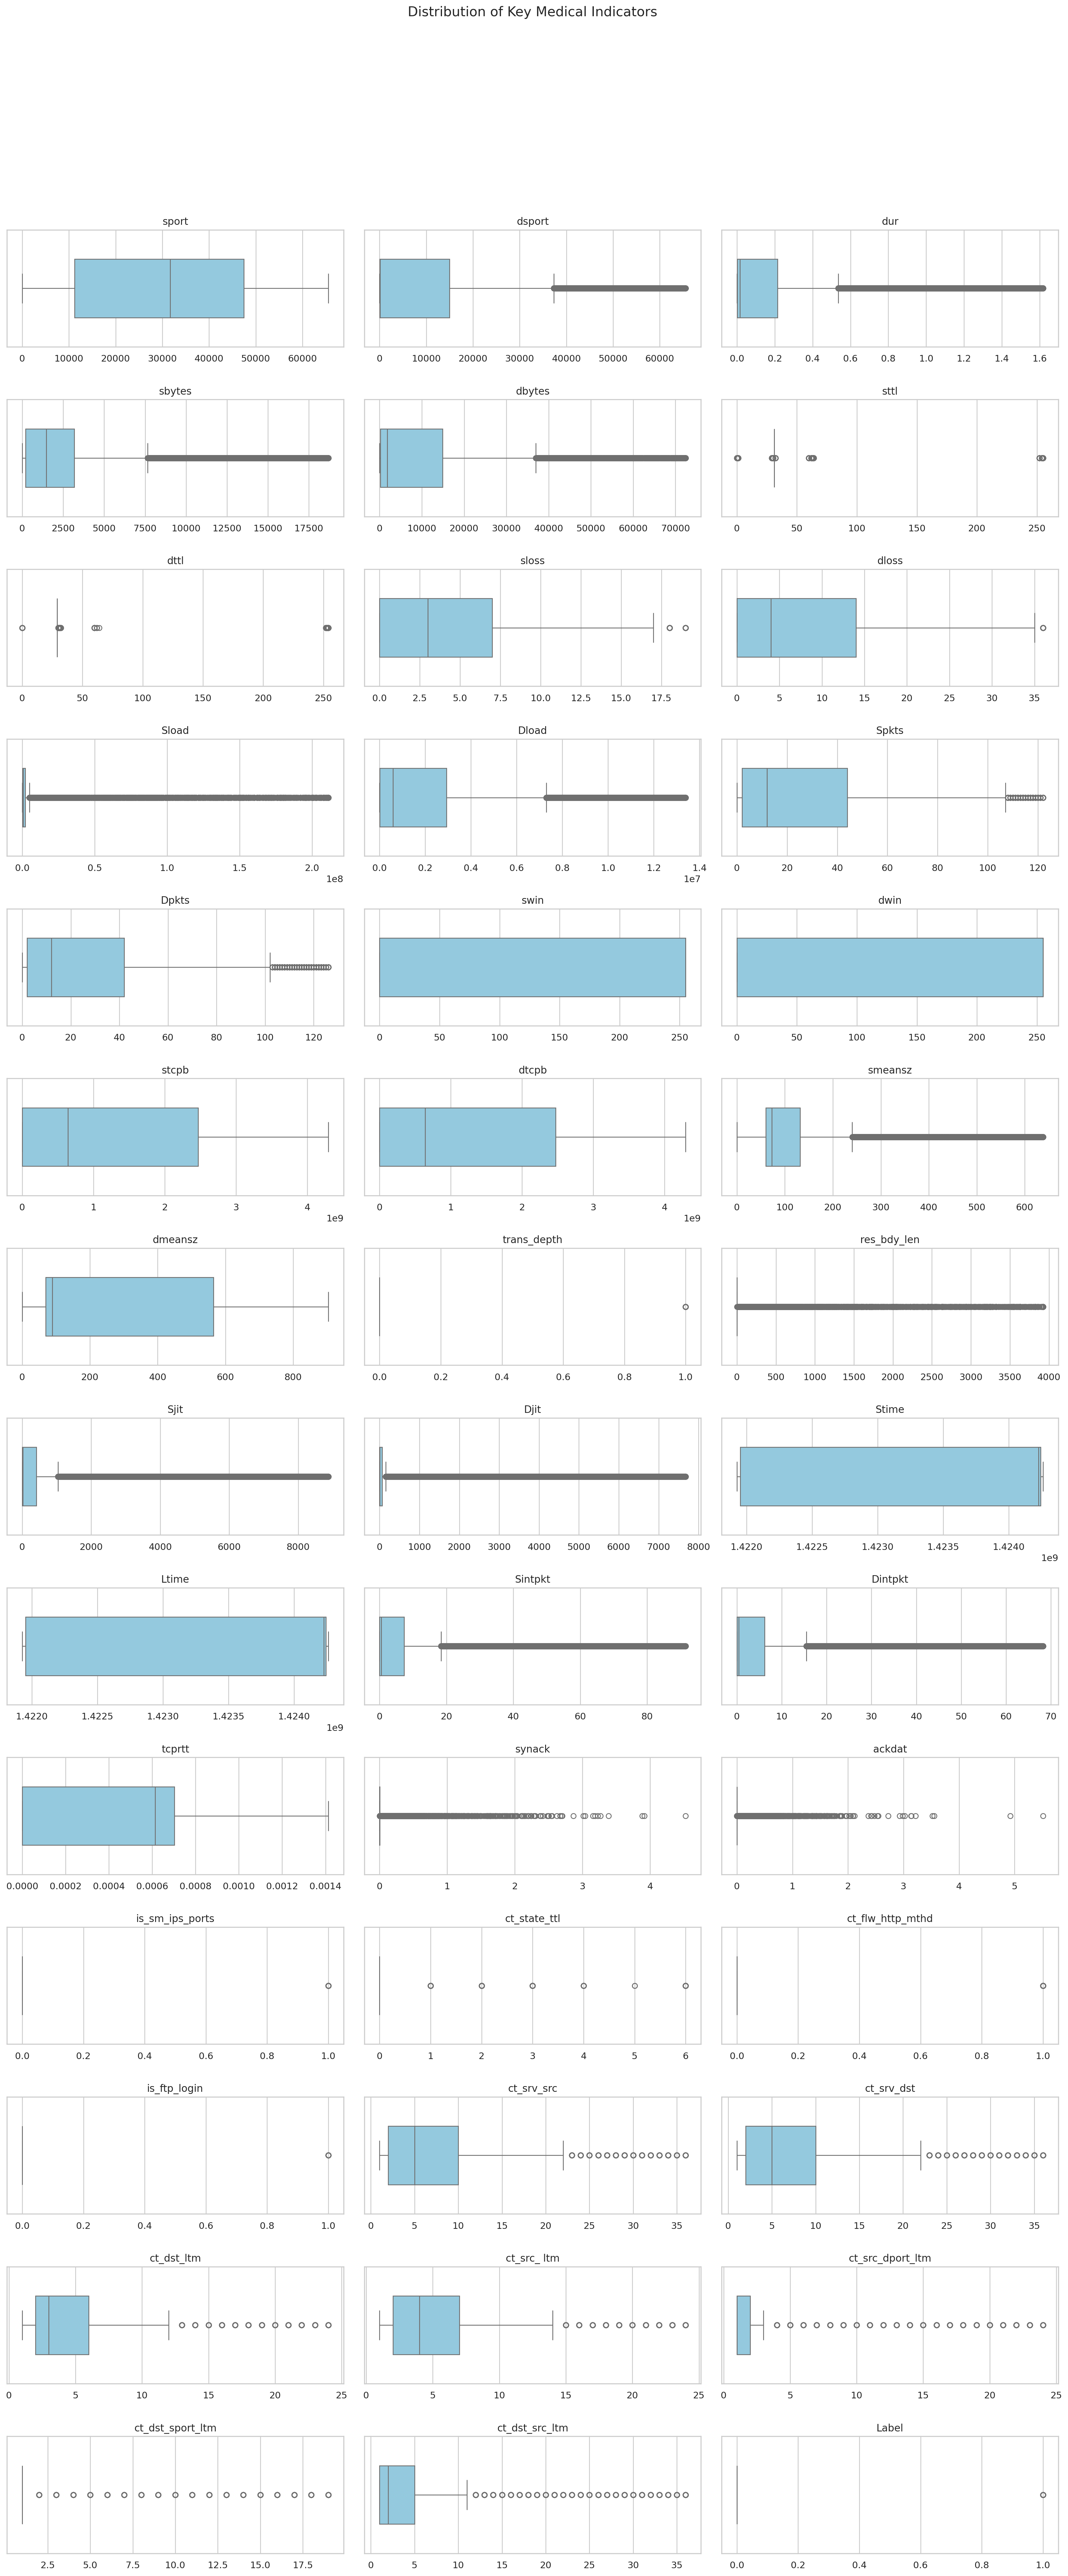

In [ ]:
import math

# Number of numerical columns
num_columns = len(numerical_columns)

# Calculate the number of rows and columns needed for the subplots
num_cols = 3  # Fixed number of columns
num_rows = math.ceil(num_columns / num_cols)  # Calculate rows needed

plt.figure(figsize=(18, num_rows * 3))

sns.set_palette("husl")
sns.set(style="whitegrid")

for i, col in enumerate(numerical_columns, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(x=df[col], color='skyblue', width=0.5)
    plt.title(col)
    plt.xlabel("")

plt.suptitle("Distribution of Key Medical Indicators", y=1.02, fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [ ]:
from scipy.stats import skew

# Set the figure size and arrange plots horizontally in pairs
numerical_features = df.select_dtypes(include=['number']).columns
num_plots = len(numerical_features)
num_rows = (num_plots + 1) // 2  # Ensure enough rows to accommodate all features
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(14, 7*num_rows))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Loop through the selected columns and create histograms with density
for i, col in enumerate(numerical_features):
    sns.histplot(data=df, x=col, kde=True, ax=axes[i])
    axes[i].set_title(f'Histogram with Density for {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Density')

    # Calculate skewness
    skewness = skew(df[col].dropna())
    axes[i].text(0.5, 0.95, f'Skewness: {skewness:.2f}', horizontalalignment='center', verticalalignment='top', transform=axes[i].transAxes)

# Remove any empty subplots if the number of features is odd
if num_plots % 2 != 0:
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

In [ ]:
# prompt: Make me a dataframe with rows showing skewness for each numeric column of df respectively. Remember that dataframe has no attribute append. Order columns by skewness. If abs of skewness is higher than 2 it is high skewness, 1-2 - moderate skewness, < 1 symmetric data.

import pandas as pd
skewness_df = pd.DataFrame(columns=['Feature', 'Skewness', 'Skewness Category'])

for col in df.select_dtypes(include=['float64', 'int64']):
    skewness_value = skew(df[col].dropna())
    if abs(skewness_value) > 2:
        category = 'High Skewness'
    elif abs(skewness_value) >= 1:
        category = 'Moderate Skewness'
    else:
        category = 'Symmetric Data'

    skewness_df = pd.concat([skewness_df, pd.DataFrame({'Feature': [col], 'Skewness': [skewness_value], 'Skewness Category': [category]})], ignore_index=True)

skewness_df = skewness_df.sort_values(by='Skewness', ascending=False)
skewness_df


,Feature,Skewness,Skewness Category
27,ackdat,31.461827,High Skewness
26,synack,31.441051,High Skewness
25,tcprtt,24.827873,High Skewness
28,is_sm_ips_ports,19.930674,High Skewness
32,ct_ftp_cmd,13.453639,High Skewness
31,is_ftp_login,6.926837,High Skewness
29,ct_state_ttl,6.835580,High Skewness
4,dttl,6.803932,High Skewness
40,label,5.342571,High Skewness
3,sttl,5.129000,High Skewness


## Применение лог.функции к численным значениям, т.к. они скошены вправо

It would have been too much of a slog to apply the log function individually, therefore a simple rule has been set up: if the number of unique values in the continuous feature is more than 50 then apply the log function. The reason more than 50 unique values are sought is to filter out the integer based features that act more categorically.  

In [ ]:
df_numeric = df.select_dtypes(include=[np.number])
df_before = df_numeric.copy()
DEBUG = 0
for feature in df_numeric.columns:
    if DEBUG == 1:
        print(feature)
        print('nunique = '+str(df_numeric[feature].nunique()))
        print(df_numeric[feature].nunique()>50)
        print('----------------------------------------------------')
    if df_numeric[feature].nunique()>50:
        if df_numeric[feature].min()==0:
            df[feature] = np.log(df[feature]+1)
        else:
            df[feature] = np.log(df[feature])

df_numeric = df.select_dtypes(include=[np.number])
print(f"Ячейка отработала: {datetime.datetime.now()}")

Ячейка отработала: 2025-03-03 12:30:02.905252


In [ ]:
skewness_dict = {
    'Feature': [],
    'Skewness Before': [],
    'Skewness After': []
}

# Итерируем по числовым столбцам
for col in df_before.select_dtypes(include=['int64', 'float64']).columns:
    # Рассчитываем асимметрию до и после применения логарифма
    skew_before = df_before[col].skew()
    #df_numeric[col] = df_numeric[col].apply(lambda x: np.log(x) if x > 0 else 0)  # Применяем логарифм
    skew_after = df_numeric[col].skew()

    # Добавляем значения в словарь
    skewness_dict['Feature'].append(col)
    skewness_dict['Skewness Before'].append(skew_before)
    skewness_dict['Skewness After'].append(skew_after)

# Создаем DataFrame из словаря
skewness_df = pd.DataFrame(skewness_dict)

# Выводим таблицу
print(skewness_df)

              Feature  Skewness Before  Skewness After
0                 dur         1.420557        1.112806
1               spkts         1.950679        1.950679
2               dpkts         2.093240        2.093240
3              sbytes         0.634950        0.318956
4              dbytes         0.270357       -0.015247
5                rate        -0.220626       -1.026477
6                sttl        -0.678109       -0.678109
7                dttl         0.895010        0.895010
8               sload        -0.508900       -3.159501
9               dload         0.280697       -0.019878
10              sloss         1.710902        1.710902
11              dloss         2.505195        2.505195
12             sinpkt         0.588852        0.391350
13             dinpkt         0.738013        0.580230
14               sjit         0.377658        0.173121
15               djit         0.720720        0.392359
16               swin         0.177048        0.177048
17        

In [ ]:
df_numeric

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
0,0.114647,6.0,4.0,5.552960,5.153292,4.318654,252,254,9.558172,9.047394,0.0,0.0,3.230630,2.238047,3.439698,2.551833,255.0,20.248085,21.512874,255.0,0.000000,0.000000,0.000000,3.761200,3.784190,0.0,0.0,1.0,0,1.0,1.0,1.0,1.0,0,0,0.0,1.0,1.0,0,0
1,0.500716,14.0,38.0,6.598509,10.573289,4.375422,62,252,9.035524,13.129483,2.0,17.0,3.930158,2.799283,4.133997,7.236180,255.0,21.072432,21.847347,255.0,0.000000,0.000000,0.000000,3.951244,6.668228,0.0,0.0,33.0,1,1.0,1.0,1.0,2.0,0,0,0.0,1.0,6.0,0,0
2,0.964368,8.0,16.0,5.897154,9.486987,2.719330,62,252,7.360913,11.017485,1.0,6.0,5.450504,4.641861,9.159728,8.024787,255.0,21.472865,21.809507,255.0,0.106068,0.059643,0.049208,3.828641,6.668228,0.0,0.0,7.0,1,2.0,1.0,1.0,3.0,0,0,0.0,2.0,6.0,0,0
3,0.986429,12.0,12.0,6.442540,6.647688,2.686289,62,252,7.916143,8.119584,1.0,3.0,5.036151,4.513447,5.560990,8.024787,255.0,20.825027,20.769618,255.0,0.000000,0.000000,0.000000,3.951244,4.174387,0.0,0.0,1.0,1,2.0,1.0,1.0,3.0,1,1,0.0,2.0,1.0,0,0
4,0.371187,10.0,6.0,6.280396,5.594711,3.537295,254,252,9.055147,8.291060,2.0,1.0,3.886712,4.339375,7.790215,4.760523,255.0,21.613680,21.404924,255.0,0.120784,0.068730,0.055656,3.970292,3.828641,0.0,0.0,33.0,1,2.0,2.0,1.0,33.0,0,0,0.0,2.0,33.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175336,0.000009,2.0,0.0,4.736198,0.000000,11.618295,254,0,17.740779,0.000000,0.0,0.0,0.008960,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,4.043051,0.000000,0.0,0.0,24.0,2,24.0,22.0,13.0,24.0,0,0,0.0,24.0,24.0,0,1
175337,0.409299,10.0,8.0,6.429719,5.872118,3.544219,254,252,9.085603,8.497907,2.0,1.0,4.014582,4.219222,8.222035,4.797258,255.0,21.981379,21.962536,255.0,0.094801,0.036231,0.060667,4.127134,3.806662,0.0,0.0,1.0,1,1.0,1.0,1.0,2.0,0,0,0.0,1.0,1.0,0,1
175338,0.000009,2.0,0.0,4.736198,0.000000,11.618295,254,0,17.740779,0.000000,0.0,0.0,0.008960,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,4.043051,0.000000,0.0,0.0,12.0,2,3.0,3.0,3.0,13.0,0,0,0.0,3.0,12.0,0,1
175339,0.000009,2.0,0.0,4.736198,0.000000,11.618295,254,0,17.740779,0.000000,0.0,0.0,0.008960,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,4.043051,0.000000,0.0,0.0,30.0,2,24.0,22.0,14.0,30.0,0,0,0.0,26.0,30.0,0,1


## Уменьшение кардинальности некоторых фичей (т.е. до 5-6 категорий)

Some features have very high cardinalities, and this section reduces the cardinality to 5 or 6 per feature. The logic is to take the top 5 occuring labels in the feature as the labels and set the remainder to '-' (seldom used) labels. When the encoding is done later on, the dimensionality will not explode and cause the curse of dimensionality.

In [ ]:
df = (df.drop(['srcip', 'dstip'], axis = 1))

In [ ]:
df_cat = df.select_dtypes(exclude=[np.number])
df_cat.describe(include='all')
#print(f"Ячейка отработала: {datetime.datetime.now()}")

# proto, service, state

Name,proto,state,service
count,128158,128158,128158
unique,94,12,11
top,tcp,FIN,-
freq,91503,90231,77712


In [ ]:
DEBUG = 0
for feature in df_cat.columns:
    if DEBUG == 1:
        print(feature)
        print('nunique = '+str(df_cat[feature].nunique()))
        print(df_cat[feature].nunique()>6)
        print(sum(df[feature].isin(df[feature].value_counts().head().index)))
        print('----------------------------------------------------')

    if df_cat[feature].nunique()>6:
        df[feature] = np.where(df[feature].isin(df[feature].value_counts().head().index), df[feature], '-')
print(f"Ячейка отработала: {datetime.datetime.now()}")

Ячейка отработала: 2025-03-03 12:30:10.394155


In [ ]:
df_cat = df.select_dtypes(exclude=[np.number])
df_cat.describe(include='all')

Name,proto,state,service
count,128158,128158,128158
unique,6,6,5
top,tcp,FIN,-
freq,91503,90231,83303


In [ ]:
df['proto'].value_counts().head().index

Index(['tcp', 'udp', 'arp', 'ospf', '-'], dtype='object', name='proto')

In [ ]:
df['proto'].value_counts().index

Index(['tcp', 'udp', 'arp', '-', 'ospf', 'unas'], dtype='object', name='proto')

In [ ]:
df.columns

Index(['srcip', 'sport', 'dstip', 'dsport', 'proto', 'state', 'dur', 'sbytes',
       'dbytes', 'sttl', 'dttl', 'sloss', 'dloss', 'service', 'sload', 'dload',
       'spkts', 'dpkts', 'swin', 'dwin', 'stcpb', 'dtcpb', 'smeansz',
       'dmeansz', 'trans_depth', 'res_bdy_len', 'sjit', 'djit', 'stime',
       'ltime', 'sintpkt', 'dintpkt', 'tcprtt', 'synack', 'ackdat',
       'is_sm_ips_ports', 'ct_state_ttl', 'ct_flw_http_mthd', 'is_ftp_login',
       'ct_ftp_cmd', 'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'label',
       'duration', 'byte_ratio', 'pkt_ratio', 'load_ratio', 'jit_ratio'],
      dtype='object', name='Name')

In [ ]:
### FEATURE ENGINEERING
def generate_features(df):
    # Duration
    df['duration'] = df['ltime'] - df['stime']

    # Ratios
    df['byte_ratio'] = df['sbytes'] / (df['dbytes'] + 1)
    df['pkt_ratio'] = df['spkts'] / (df['dpkts'] + 1)
    df['load_ratio'] = df['sload'] / (df['dload'] + 1)
    df['jit_ratio'] = df['sjit'] / (df['djit'] + 1)
    df['inter_pkt_ratio'] = df['sintpkt'] / (df['dintpkt'] + 1)
    #df['inter_pkt_ratio'] = df['sinpkt'] / (df['dinpkt'] + 1) для train
    df['tcp_setup_ratio'] = df['tcprtt'] / (df['synack'] + df['ackdat'] + 1)

    # Aggregate Features
    df['total_bytes'] = df['sbytes'] + df['dbytes']
    df['total_pkts'] = df['spkts'] + df['dpkts']
    df['total_load'] = df['sload'] + df['dload']
    df['total_jitter'] = df['sjit'] + df['djit']
    df['total_inter_pkt'] = df['sintpkt'] + df['dintpkt']
    #df['total_inter_pkt'] = df['sinpkt'] + df['dinpkt']
    df['total_tcp_setup'] = df['tcprtt'] + df['synack'] + df['ackdat']

    # Interaction Features
    df['byte_pkt_interaction_src'] = df['sbytes'] * df['spkts']
    df['byte_pkt_interaction_dst'] = df['dbytes'] * df['dpkts']
    df['load_jit_interaction_src'] = df['sload'] * df['sjit']
    df['load_jit_interaction_dst'] = df['dload'] * df['djit']
    df['pkt_jit_interaction_src'] = df['dpkts'] * df['sjit']
    df['pkt_jit_interaction_dst'] = df['dpkts'] * df['djit']

    # Statistical Features
    df['mean_pkt_size'] = df['smeansz'] + df['dmeansz'] # фичей видимо нет в train
    df['tcp_seq_diff'] = df['stcpb'] - df['dtcpb']

    return df
generate_features(df)

Name,sport,dsport,proto,state,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,service,sload,dload,spkts,dpkts,swin,dwin,stcpb,dtcpb,smeansz,dmeansz,trans_depth,res_bdy_len,sjit,djit,stime,ltime,sintpkt,dintpkt,tcprtt,synack,ackdat,is_sm_ips_ports,ct_state_ttl,ct_flw_http_mthd,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,label,duration,byte_ratio,pkt_ratio,load_ratio,jit_ratio,inter_pkt_ratio,tcp_setup_ratio,total_bytes,total_pkts,total_load,total_jitter,total_inter_pkt,total_tcp_setup,byte_pkt_interaction_src,byte_pkt_interaction_dst,load_jit_interaction_src,load_jit_interaction_dst,pkt_jit_interaction_src,pkt_jit_interaction_dst,mean_pkt_size,tcp_seq_diff
395099,11.052508,9.745605,tcp,FIN,0.035419,7.880804,10.069214,31,29,7.0,15.0,-,13.258888,15.448381,3.737670,3.806662,255,255,21.837966,20.655213,4.143135,6.285998,0,0.000000,4.174150,4.138216,21.075291,21.075291,0.624464,0.601657,0.000727,0.000569,0.000158,0,0,0.0,0,0,9,9,3.0,4.0,1.0,1.0,1.0,0,0.000000e+00,0.711957,0.777602,0.806091,0.812373,0.389886,0.000726,17.950018,7.544332,28.707268,8.312366,1.226120,0.001454,29.455843,38.330099,55.344581,63.928745,15.889579,15.752793,10.429133,1.182753
118549,9.649885,4.394449,tcp,FIN,0.695558,7.365180,9.227099,31,29,3.0,5.0,http,9.353342,11.244574,2.484907,2.944439,255,255,21.194074,21.194692,4.882802,6.338594,1,8.275122,9.161735,8.945783,21.075282,21.075282,4.525234,4.095649,0.000622,0.000489,0.000133,0,0,1.0,0,0,2,1,3.0,5.0,1.0,1.0,2.0,0,7.032703e-10,0.720163,0.629977,0.763876,0.921168,0.888059,0.000621,16.592279,5.429346,20.597916,18.107517,8.620883,0.001244,18.301785,27.168630,85.692836,100.591515,26.976169,26.340311,11.221396,-0.000618
525054,10.389211,10.349423,tcp,FIN,0.026440,8.210668,7.848153,31,29,7.0,7.0,-,13.852695,13.495527,2.890372,3.044522,255,255,21.779181,21.780352,5.318120,4.859812,0,0.000000,5.159363,1.752806,21.075293,21.075293,0.937983,0.867277,0.000698,0.000561,0.000137,0,0,0.0,0,0,3,7,2.0,1.0,1.0,1.0,1.0,0,0.000000e+00,0.927953,0.714639,0.955653,1.874219,0.502327,0.000697,16.058821,5.934894,27.348221,6.912170,1.805261,0.001396,23.731883,23.893878,71.471083,23.655046,15.707797,5.336458,10.177932,-0.001172
246597,9.401952,3.988984,udp,CON,0.001059,4.882802,5.105945,31,29,0.0,0.0,dns,13.118585,13.335649,0.693147,1.098612,0,0,0.000000,0.000000,4.189655,4.418841,0,0.000000,0.000000,0.000000,21.075286,21.075286,0.011929,0.008960,0.000000,0.000000,0.000000,0,0,0.0,0,0,2,1,2.0,3.0,1.0,1.0,2.0,0,0.000000e+00,0.799680,0.330288,0.915102,0.000000,0.011823,0.000000,9.988747,1.791759,26.454233,0.000000,0.020888,0.000000,3.384500,5.609454,0.000000,0.000000,0.000000,0.000000,8.608495,0.000000
231868,10.635543,8.761550,tcp,FIN,0.010806,7.709757,9.630957,31,29,7.0,11.0,-,14.281826,16.204370,3.526361,3.610918,255,255,20.608704,21.834284,4.189655,6.049733,0,0.000000,3.054875,2.999827,21.075285,21.075285,0.277242,0.257761,0.000701,0.000565,0.000136,0,0,0.0,0,0,6,5,4.0,5.0,1.0,1.0,1.0,0,0.000000e+00,0.725218,0.764785,0.830128,0.763752,0.220425,0.000700,17.340714,7.137278,30.486197,6.054702,0.535002,0.001402,27.187382,34.776594,43.629197,48.610305,11.030904,10.832128,10.239388,-1.225579
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
679928,10.560334,3.988984,udp,CON,0.001029,4.882802,5.105945,31,29,0.0,0.0,dns,13.147295,13.364359,0.693147,1.098612,0,0,0.000000,0.000000,4.189655,4.418841,0,0.000000,0.000000,0.000000,21.075298,21.075298,0.005982,0.007968,0.000000,0.000000,0.000000,0,0,0.0,0,0,2,2,3.0,2.0,1.0,1.0,1.0,0,0.000000e+00,0.799680,0.330288,0.915272,0.000000,0.005935,0.000000,9.988747,1.791759,26.511653,0.000000,0.013950,0.000000,3.384500,5.609454,0.000000,0.000000,0.000000,0.000000,8.608495,0.000000
613018,8.588211,3.988984,udp,CON,0.001051,4.

In [ ]:
# prompt: drop ltime, stime from df

df = df.drop(['ltime', 'stime'], axis=1)


## Дропмним скоррелированные фичи.  

<Axes: title={'center': 'Correlation Plot'}, xlabel='Name', ylabel='Name'>

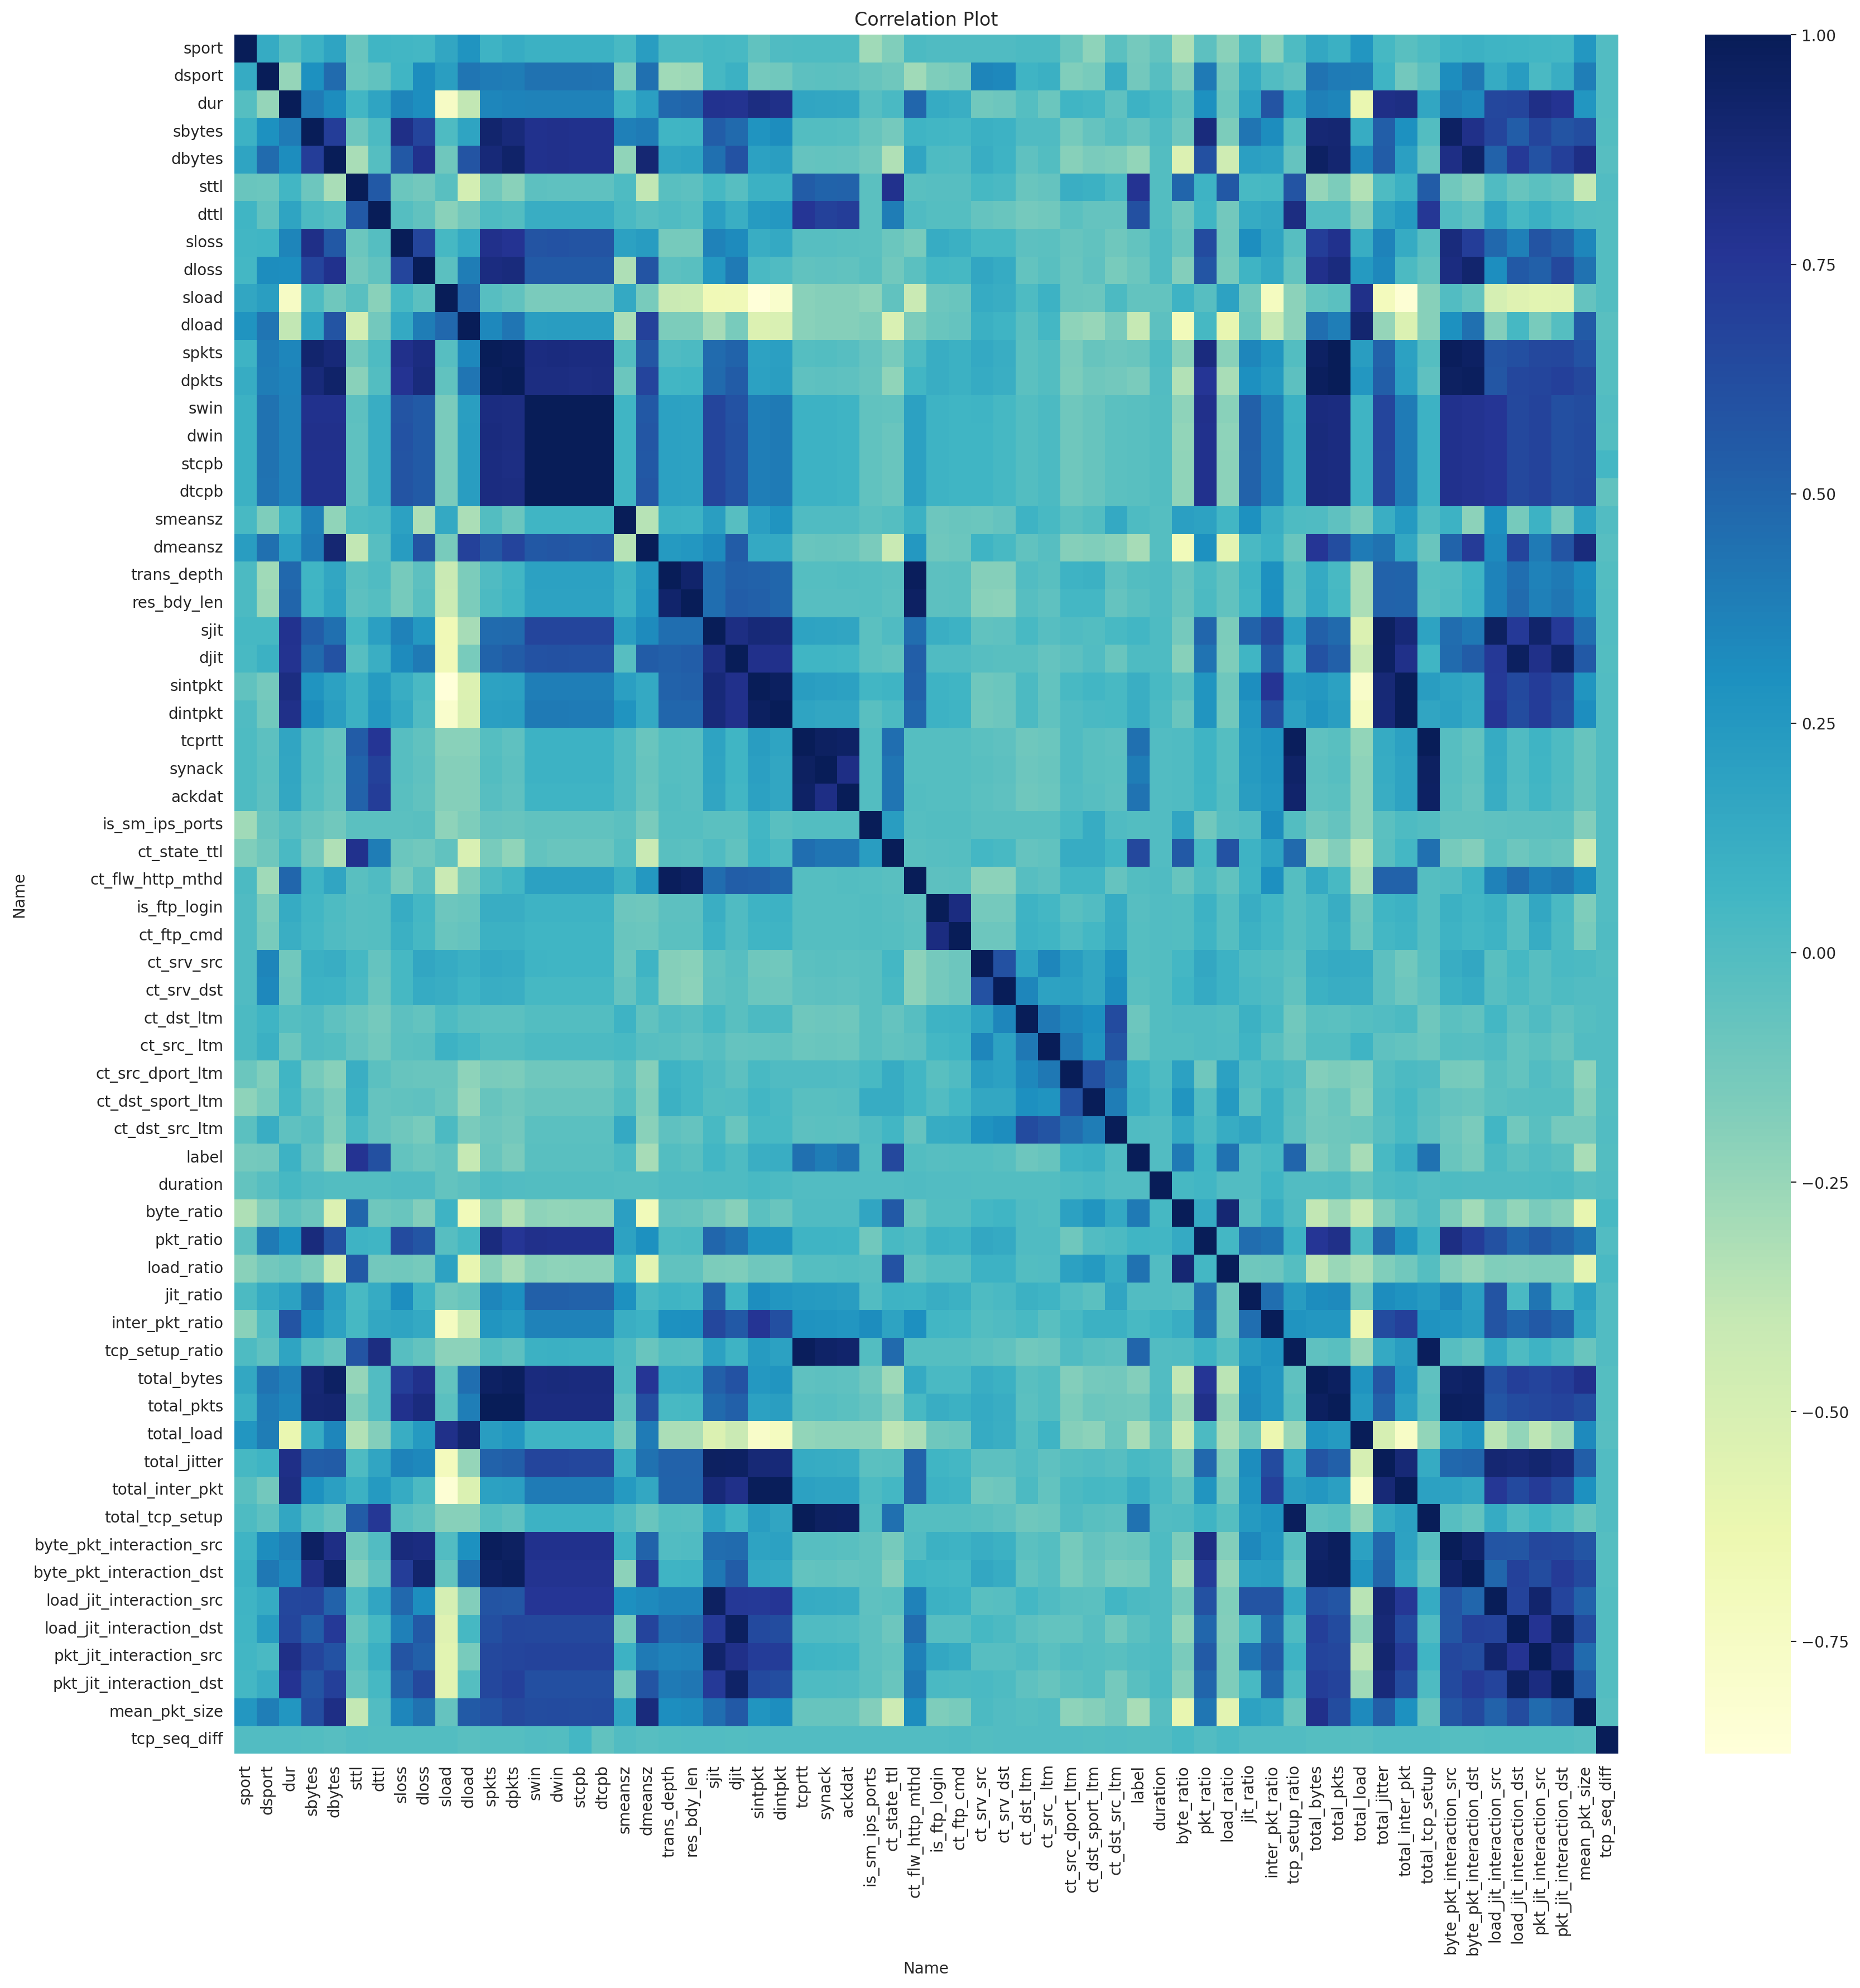

In [ ]:
plt.figure(figsize=(20,20))
plt.title("Correlation Plot")
sns.heatmap(df.corr(numeric_only=True),cmap='YlGnBu')

In [ ]:
correlation_matrix = df.corr(numeric_only=True)

# Create a mask to identify the features with a correlation coefficient greater than or equal to 0.75
high_correlation_mask = correlation_matrix >= 0.75

# Identify and list the highly correlated features
highly_correlated_features = []

for feature in high_correlation_mask.columns:
    correlated_with = high_correlation_mask.index[high_correlation_mask[feature]].tolist()
    for correlated_feature in correlated_with:
        if feature != correlated_feature and (correlated_feature, feature) not in highly_correlated_features:
            highly_correlated_features.append((feature, correlated_feature))

# Print the highly correlated features
print("Highly correlated features:")
for feature1, feature2 in highly_correlated_features:
    print(f"{feature1} and {feature2}")

Highly correlated features:
dur and sjit
dur and djit
dur and sintpkt
dur and dintpkt
dur and total_jitter
dur and total_inter_pkt
dur and pkt_jit_interaction_src
dur and pkt_jit_interaction_dst
sbytes and sloss
sbytes and spkts
sbytes and dpkts
sbytes and swin
sbytes and dwin
sbytes and stcpb
sbytes and dtcpb
sbytes and pkt_ratio
sbytes and total_bytes
sbytes and total_pkts
sbytes and byte_pkt_interaction_src
sbytes and byte_pkt_interaction_dst
dbytes and dloss
dbytes and spkts
dbytes and dpkts
dbytes and swin
dbytes and dwin
dbytes and stcpb
dbytes and dtcpb
dbytes and dmeansz
dbytes and total_bytes
dbytes and total_pkts
dbytes and byte_pkt_interaction_src
dbytes and byte_pkt_interaction_dst
dbytes and mean_pkt_size
sttl and ct_state_ttl
sttl and label
dttl and tcprtt
dttl and tcp_setup_ratio
sloss and spkts
sloss and dpkts
sloss and total_pkts
sloss and byte_pkt_interaction_src
dloss and spkts
dloss and dpkts
dloss and total_bytes
dloss and total_pkts
dloss and byte_pkt_interaction_

In [ ]:
features_to_drop = set()

# Iterate over the highly correlated features and add one of each pair to the drop list
for feature1, feature2 in highly_correlated_features:
    if feature1 not in features_to_drop and feature2 not in features_to_drop:
        features_to_drop.add(feature2)  # You can choose feature1 or feature2 to drop

features_to_drop

{'ackdat',
 'byte_pkt_interaction_dst',
 'byte_pkt_interaction_src',
 'ct_flw_http_mthd',
 'ct_ftp_cmd',
 'ct_state_ttl',
 'dintpkt',
 'djit',
 'dloss',
 'dmeansz',
 'dpkts',
 'dtcpb',
 'dwin',
 'label',
 'load_ratio',
 'mean_pkt_size',
 'pkt_jit_interaction_dst',
 'pkt_jit_interaction_src',
 'pkt_ratio',
 'res_bdy_len',
 'sintpkt',
 'sjit',
 'sloss',
 'spkts',
 'stcpb',
 'swin',
 'tcp_setup_ratio',
 'tcprtt',
 'total_bytes',
 'total_inter_pkt',
 'total_jitter',
 'total_load',
 'total_pkts',
 'total_tcp_setup'}

In [ ]:
# prompt: features_to_drop has several features to drop from df. Delete "label" from features_to_drop.
features_to_drop.discard("label")

In [ ]:
df = df.drop(columns=features_to_drop)

In [ ]:
df.head(3)

Name,sport,dsport,proto,state,dur,sbytes,dbytes,sttl,dttl,service,sload,dload,smeansz,trans_depth,synack,is_sm_ips_ports,is_ftp_login,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,label,duration,byte_ratio,jit_ratio,inter_pkt_ratio,load_jit_interaction_src,load_jit_interaction_dst,tcp_seq_diff
395099,11.052508,9.745605,tcp,FIN,0.035419,7.880804,10.069214,31,29,-,13.258888,15.448381,4.143135,0,0.000569,0,0,9,9,3.0,4.0,1.0,1.0,1.0,0,0.000000e+00,0.711957,0.812373,0.389886,55.344581,63.928745,1.182753
118549,9.649885,4.394449,tcp,FIN,0.695558,7.365180,9.227099,31,29,http,9.353342,11.244574,4.882802,1,0.000489,0,0,2,1,3.0,5.0,1.0,1.0,2.0,0,7.032703e-10,0.720163,0.921168,0.888059,85.692836,100.591515,-0.000618
525054,10.389211,10.349423,tcp,FIN,0.026440,8.210668,7.848153,31,29,-,13.852695,13.495527,5.318120,0,0.000561,0,0,3,7,2.0,1.0,1.0,1.0,1.0,0,0.000000e+00,0.927953,1.874219,0.502327,71.471083,23.655046,-0.001172


## Best Features

This section does an analysis (univariate statistical tests) to determine which features best predict the target feature.

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2

In [ ]:
df.isna().sum()

,0
Name,
sport,0
dsport,0
proto,0
state,0
dur,0
sbytes,0
dbytes,0
sttl,0
dttl,0


In [ ]:
# есть одна nan строчка, дропнем
df.isna().any(axis = 1).sum()

0

In [ ]:
# prompt: select df without categorical features
import numpy as np
df_numeric = df.select_dtypes(include=[np.number])
df_numeric.columns

Index(['sport', 'dsport', 'dur', 'sbytes', 'dbytes', 'sttl', 'dttl', 'sload',
       'dload', 'smeansz', 'trans_depth', 'synack', 'is_sm_ips_ports',
       'is_ftp_login', 'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'label',
       'duration', 'byte_ratio', 'jit_ratio', 'inter_pkt_ratio',
       'load_jit_interaction_src', 'load_jit_interaction_dst', 'tcp_seq_diff'],
      dtype='object', name='Name')

In [ ]:
df.select_dtypes(include=[np.number])

Name,sport,dsport,dur,sbytes,dbytes,sttl,dttl,sload,dload,smeansz,trans_depth,synack,is_sm_ips_ports,is_ftp_login,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,duration,byte_ratio,jit_ratio,inter_pkt_ratio,load_jit_interaction_src,load_jit_interaction_dst,tcp_seq_diff
395099,11.052508,9.745605,0.035419,7.880804,10.069214,31,29,13.258888,15.448381,4.143135,0,0.000569,0,0,9,9,3.0,4.0,1.0,1.0,1.0,0.000000e+00,0.711957,0.812373,0.389886,55.344581,63.928745,1.182753
118549,9.649885,4.394449,0.695558,7.365180,9.227099,31,29,9.353342,11.244574,4.882802,1,0.000489,0,0,2,1,3.0,5.0,1.0,1.0,2.0,7.032703e-10,0.720163,0.921168,0.888059,85.692836,100.591515,-0.000618
525054,10.389211,10.349423,0.026440,8.210668,7.848153,31,29,13.852695,13.495527,5.318120,0,0.000561,0,0,3,7,2.0,1.0,1.0,1.0,1.0,0.000000e+00,0.927953,1.874219,0.502327,71.471083,23.655046,-0.001172
246597,9.401952,3.988984,0.001059,4.882802,5.105945,31,29,13.118585,13.335649,4.189655,0,0.000000,0,0,2,1,2.0,3.0,1.0,1.0,2.0,0.000000e+00,0.799680,0.000000,0.011823,0.000000,0.000000,0.000000
231868,10.635543,8.761550,0.010806,7.709757,9.630957,31,29,14.281826,16.204370,4.189655,0,0.000565,0,0,6,5,4.0,5.0,1.0,1.0,1.0,0.000000e+00,0.725218,0.763752,0.220425,43.629197,48.610305,-1.225579
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
679928,10.560334,3.988984,0.001029,4.882802,5.105945,31,29,13.147295,13.364359,4.189655,0,0.000000,0,0,2,2,3.0,2.0,1.0,1.0,1.0,0.000000e+00,0.799680,0.000000,0.005935,0.000000,0.000000,0.000000
613018,8.588211,3.988984,0.001051,4.983607,5.187386,31,29,13.226965,13.425142,4.290459,0,0.000000,0,0,3,3,1.0,5.0,1.0,1.0,1.0,0.000000e+00,0.805446,0.000000,0.001976,0.000000,0.000000,0.000000
623364,9.942275,3.988984,0.001009,4.867534,5.093750,31,29,13.151636,13.371697,4.174387,0,0.000000,0,0,4,5,1.0,2.0,1.0,1.0,1.0,0.000000e+00,0.798775,0.000000,0.009862,0.000000,0.000000,0.000000
221038,11.087084,7.495542,0.004907,8.425078,7.806696,31,29,15.535821,15.143414,5.533389,0,0.000577,0,0,3,5,5.0,3.0,1.0,1.0,3.0,0.000000e+00,0.956667,2.065832,0.194943,41.376439,4.379637,1.811293


In [ ]:
# prompt: find columns with negative valeus in df

import numpy as np
# Assuming 'df' is your DataFrame from the provided code.
negative_columns = []
for col in df.select_dtypes(include=[np.number]):  # Check only numerical columns
    if (df[col] < 0).any():
        negative_columns.append(col)
print("Columns with negative values:", negative_columns)


Columns with negative values: ['tcp_seq_diff']


In [ ]:
# prompt: Reshape df['tcp_seq_diff'] to contain values between 0 and 1

# Min-Max scaling
min_val = df['tcp_seq_diff'].min()
max_val = df['tcp_seq_diff'].max()
df['tcp_seq_diff'] = (df['tcp_seq_diff'] - min_val) / (max_val - min_val)

In [ ]:
# Feature Selection
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif
# mutual_info_classif
best_features = SelectKBest(score_func=chi2,k='all')
X = df.select_dtypes(include=[np.number])
#X = df.drop(['tcp_seq_diff'], axis = 1).select_dtypes(include=[np.number])
y = df['label']
#X.drop(['tcp_seq_diff'], inplace = True)
#X = df.iloc[:,4:-2]
#y = df.iloc[:,-1]

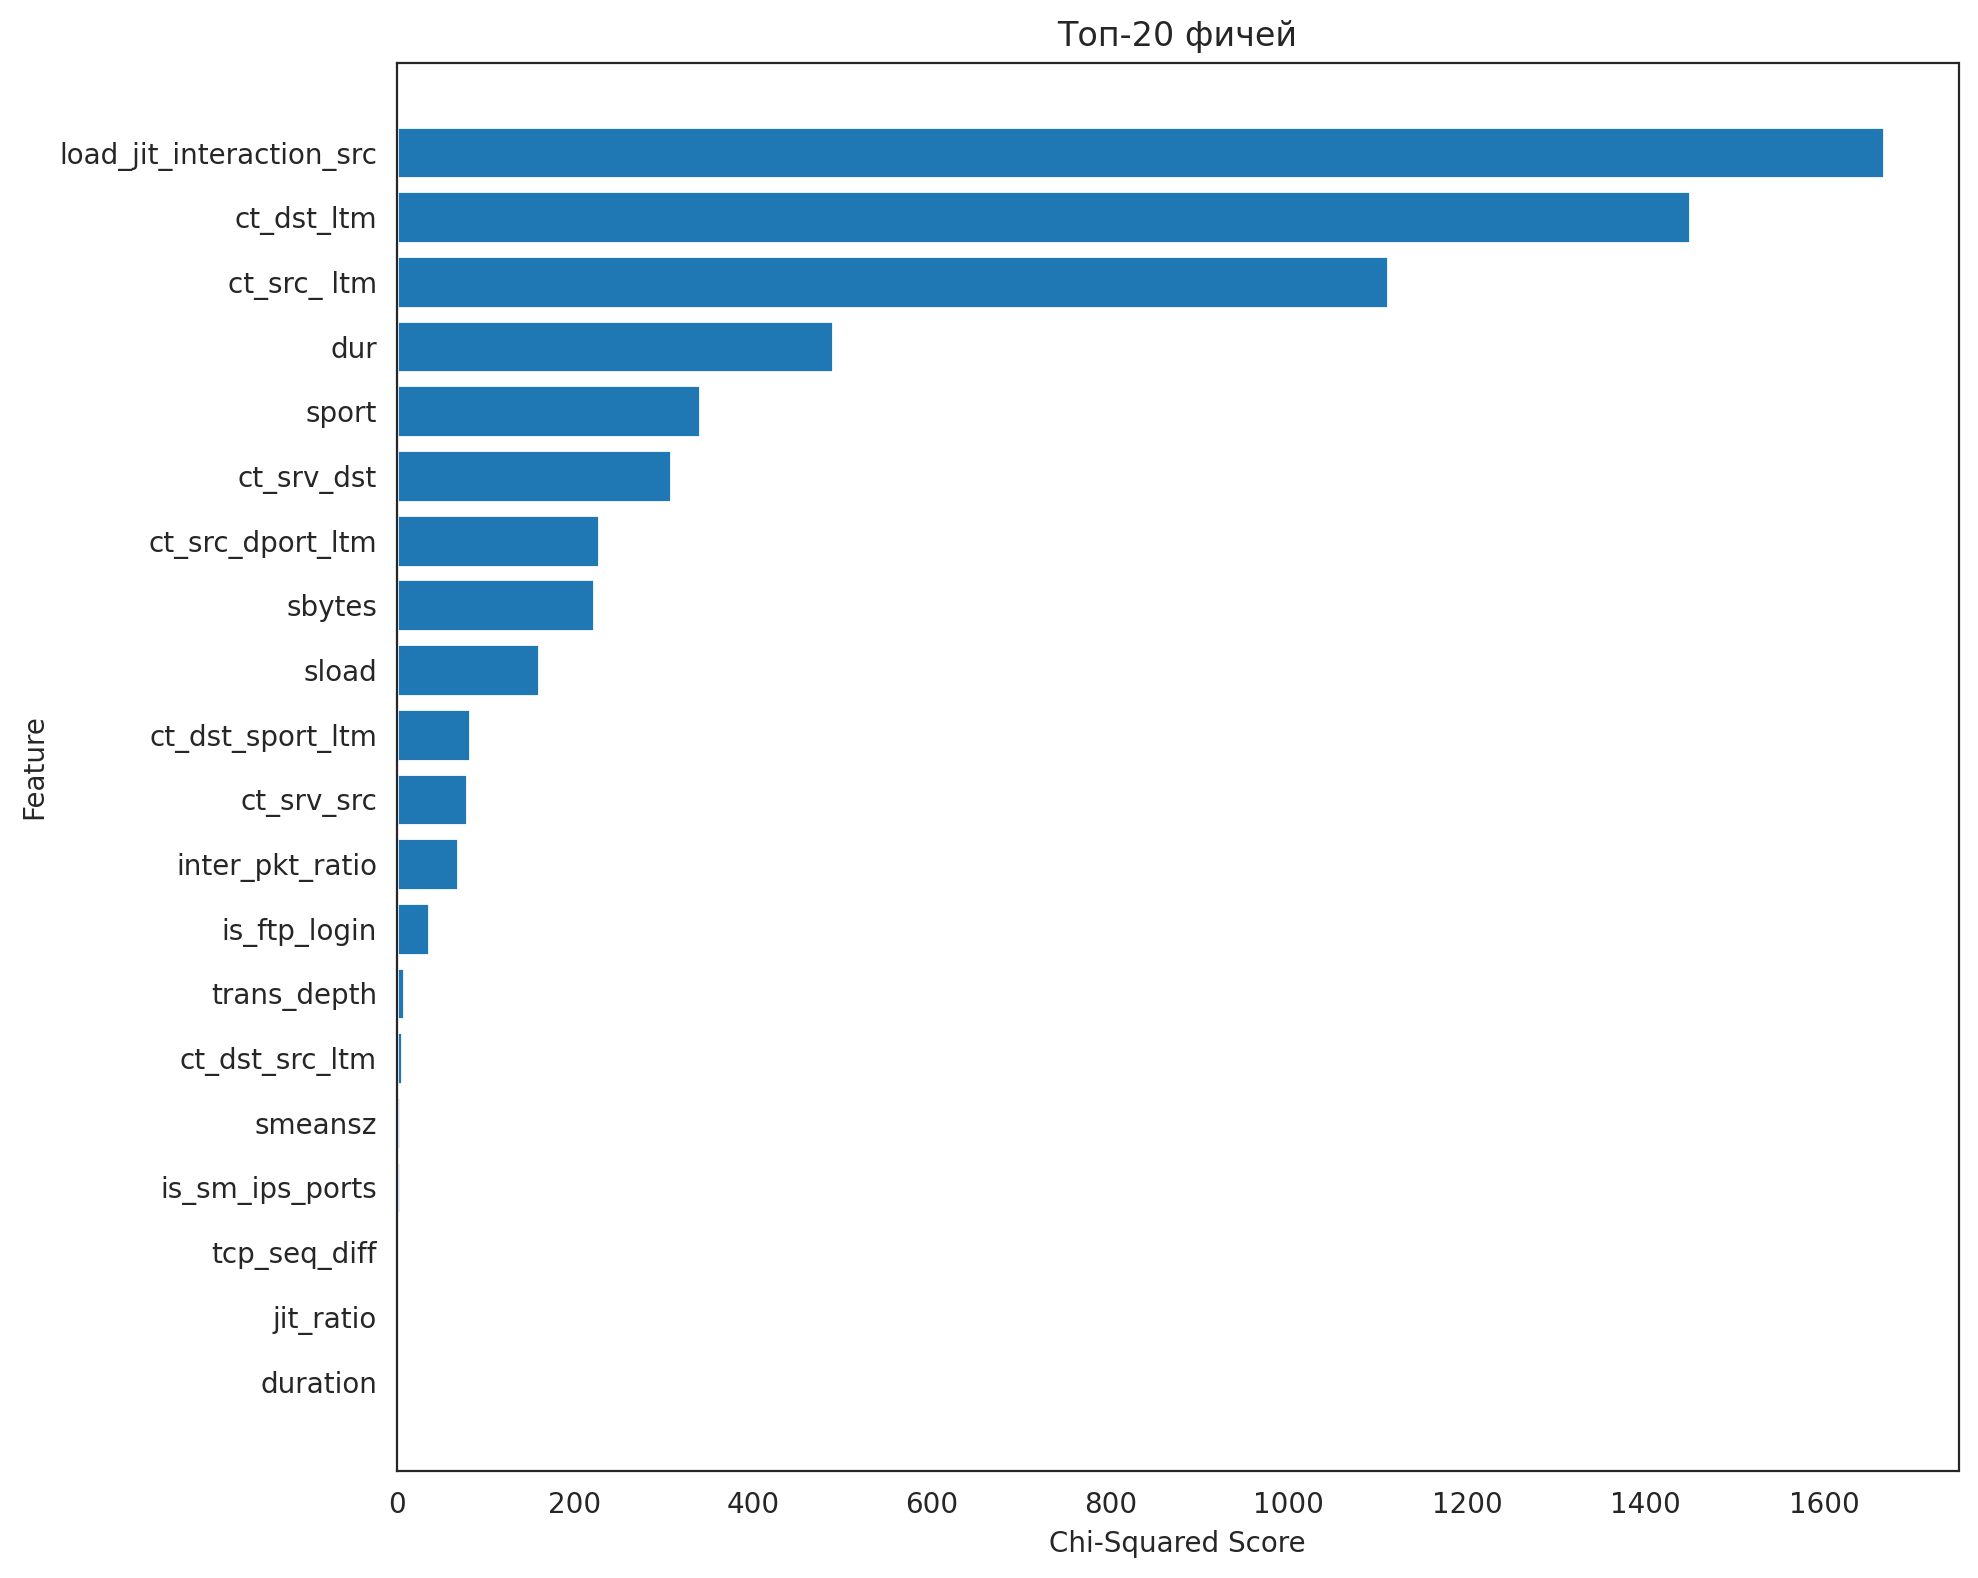

In [ ]:
fit = best_features.fit(X,y)

df_scores=pd.DataFrame(fit.scores_)
df_col=pd.DataFrame(X.columns)
feature_score=pd.concat([df_col,df_scores],axis=1)
feature_score.columns=['feature','score']
feature_score.sort_values(by=['score'],ascending=True,inplace=True)

top_features = feature_score.head(20)  # Select top 20 features

plt.figure(figsize=(10, 8))
plt.barh(top_features['feature'], top_features['score'])
plt.title("Топ-20 фичей")
plt.xlabel("Chi-Squared Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

## Encode categorical features

The categorical features must be encoded to ensure that the models can interpret them. One-hot encoding is used since none of the categorical features are ordinal.  

In [ ]:
df.iloc[:,:-1]

Name,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,service,sload,dload,spkts,dpkts,swin,dwin,stcpb,dtcpb,smeansz,dmeansz,trans_depth,res_bdy_len,sjit,djit,sintpkt,dintpkt,tcprtt,synack,ackdat,is_sm_ips_ports,ct_state_ttl,ct_flw_http_mthd,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,label,duration,byte_ratio,pkt_ratio,load_ratio,jit_ratio,inter_pkt_ratio,tcp_setup_ratio,total_bytes,total_pkts,total_load,total_jitter,total_inter_pkt,total_tcp_setup,byte_pkt_interaction_src,byte_pkt_interaction_dst,load_jit_interaction_src,load_jit_interaction_dst,pkt_jit_interaction_src,pkt_jit_interaction_dst,mean_pkt_size
0,59.166.0.0,-,-,53,udp,CON,0.001054,4.890349,5.105945,31,29,0.0,0.0,dns,13.123313,13.340377,1.098612,1.098612,0,0,0.000000,0.000000,4.204693,4.418841,0,0.000000,0.000000,0.000000,0.016857,0.012916,0.000000,0.000000,0.000000,0,0,0.0,0,0,3,7,1.0,3.0,1.0,1.0,1.0,0,0.000000e+00,0.800916,0.523495,0.915130,0.000000,0.016642,0.000000,9.996295,2.197225,26.463690,0.000000,0.029773,0.000000,5.372598,5.609454,0.000000,0.000000,0.000000,0.000000,8.623533
1,59.166.0.0,-,-,-,udp,CON,0.035496,6.270988,5.720312,31,29,0.0,0.0,-,11.381416,10.829356,1.609438,1.609438,0,0,0.000000,0.000000,4.890349,4.343805,0,0.000000,2.387938,2.458112,2.080066,2.147606,0.000000,0.000000,0.000000,0,0,0.0,0,0,2,4,2.0,3.0,1.0,1.0,2.0,0,0.000000e+00,0.933140,0.616776,0.962133,0.690532,0.660841,0.000000,11.991300,3.218876,22.210772,4.846050,4.227673,0.000000,10.092767,9.206487,27.178112,26.619769,3.843237,3.956179,9.234155
2,-,-,-,53,udp,CON,0.001118,4.990433,5.187386,31,29,0.0,0.0,dns,13.165223,13.363399,1.098612,1.098612,0,0,0.000000,0.000000,4.304065,4.499810,0,0.000000,0.000000,0.000000,0.016857,0.012916,0.000000,0.000000,0.000000,0,0,0.0,0,0,12,8,1.0,2.0,2.0,1.0,1.0,0,0.000000e+00,0.806549,0.523495,0.916581,0.000000,0.016642,0.000000,10.177818,2.197225,26.528622,0.000000,0.029773,0.000000,5.482551,5.698926,0.000000,0.000000,0.000000,0.000000,8.803875
3,59.166.0.5,-,149.171.126.5,53,udp,CON,0.001208,4.890349,5.105945,31,29,0.0,0.0,dns,12.987060,13.204124,1.098612,1.098612,0,0,0.000000,0.000000,4.204693,4.418841,0,0.000000,0.000000,0.000000,0.042101,0.013903,0.000000,0.000000,0.000000,0,0,0.0,0,0,6,9,1.0,1.0,1.0,1.0,1.0,0,0.000000e+00,0.800916,0.523495,0.914316,0.000000,0.041524,0.000000,9.996295,2.197225,26.191185,0.000000,0.056004,0.000000,5.372598,5.609454,0.000000,0.000000,0.000000,0.000000,8.623533
4,-,-,149.171.126.0,53,udp,CON,0.001168,4.990433,5.187386,31,29,0.0,0.0,dns,13.121510,13.319686,1.098612,1.098612,0,0,0.000000,0.000000,4.304065,4.499810,0,0.000000,0.000000,0.000000,0.004988,0.002996,0.000000,0.000000,0.000000,0,0,0.0,0,0,7,9,1.0,1.0,1.0,1.0,1.0,0,0.000000e+00,0.806549,0.523495,0.916327,0.000000,0.004973,0.000000,10.177818,2.197225,26.441196,0.000000,0.007983,0.000000,5.482551,5.698926,0.000000,0.000000,0.000000,0.000000,8.803875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699996,-,-,-,-,tcp,FIN,0.020178,5.771441,7.536364,31,29,1.0,2.0,-,11.559754,13.374949,1.945910,2.197225,255,255,21.889127,21.894350,3.988984,5.459586,0,0.000000,5.365091,1.405900,1.610917,1.107714,0.006366,0.006170,0.000197,0,0,0.0,0,0,8,20,7.0,5.0,1.0,1.0,4.0,0,0.000000e+00,0.676101,0.608625,0.804160,2.229973,0.764296,0.006325,13.307805,4.143135,24.934702,6.770991,2.718631,0.012733,11.230706,16.559084,62.019133,18.803836,11.788310,3.089077,9.448570
699997,59.166.0.0,-,-,80,tcp,FIN,0.876700,9.873595,11.371281,31,29,2.0,42.0,http,11.611678,15.639269,4.812184,4.844187,255,255,19.462005,21.611049,3.988984,6.867974,1,8.275122,5.322077,4.746440,1.581867,1.058631,0.000712,0.000550,0.000162,0,0,1.0,0,0,1,1,2.0,7.0,2.0,2.0,2.0,0,7.032561e-10,0.798106,0.823414,0.6

In [ ]:
df.sport.unique()

array([11.05250774,  9.64988479, 10.38921073, ..., 11.05728223,
       10.94033081, 10.21412903])

In [ ]:
# prompt: df has the following categorical values df_cat_names = ['srcip', 'sport', 'dstip', 'dsport', 'proto', 'state', 'service']
# Put them in the start of the dataframe

#df_cat_names = ['srcip', 'sport', 'dstip', 'dsport', 'proto', 'state', 'service']
df_cat_names = ['proto', 'state', 'service']
# Move specified columns to the beginning of the DataFrame
new_order = df_cat_names + [col for col in df.columns if col not in df_cat_names]
df = df[new_order]
df

Name,proto,state,service,sport,dsport,dur,sbytes,dbytes,sttl,dttl,sload,dload,smeansz,trans_depth,synack,is_sm_ips_ports,is_ftp_login,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,label,duration,byte_ratio,jit_ratio,inter_pkt_ratio,load_jit_interaction_src,load_jit_interaction_dst,tcp_seq_diff
395099,tcp,FIN,-,11.052508,9.745605,0.035419,7.880804,10.069214,31,29,13.258888,15.448381,4.143135,0,0.000569,0,0,9,9,3.0,4.0,1.0,1.0,1.0,0,0.000000e+00,0.711957,0.812373,0.389886,55.344581,63.928745,0.326326
118549,tcp,FIN,http,9.649885,4.394449,0.695558,7.365180,9.227099,31,29,9.353342,11.244574,4.882802,1,0.000489,0,0,2,1,3.0,5.0,1.0,1.0,2.0,0,7.032703e-10,0.720163,0.921168,0.888059,85.692836,100.591515,0.288301
525054,tcp,FIN,-,10.389211,10.349423,0.026440,8.210668,7.848153,31,29,13.852695,13.495527,5.318120,0,0.000561,0,0,3,7,2.0,1.0,1.0,1.0,1.0,0,0.000000e+00,0.927953,1.874219,0.502327,71.471083,23.655046,0.288283
246597,udp,CON,dns,9.401952,3.988984,0.001059,4.882802,5.105945,31,29,13.118585,13.335649,4.189655,0,0.000000,0,0,2,1,2.0,3.0,1.0,1.0,2.0,0,0.000000e+00,0.799680,0.000000,0.011823,0.000000,0.000000,0.288321
231868,tcp,FIN,-,10.635543,8.761550,0.010806,7.709757,9.630957,31,29,14.281826,16.204370,4.189655,0,0.000565,0,0,6,5,4.0,5.0,1.0,1.0,1.0,0,0.000000e+00,0.725218,0.763752,0.220425,43.629197,48.610305,0.248940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
679928,udp,CON,dns,10.560334,3.988984,0.001029,4.882802,5.105945,31,29,13.147295,13.364359,4.189655,0,0.000000,0,0,2,2,3.0,2.0,1.0,1.0,1.0,0,0.000000e+00,0.799680,0.000000,0.005935,0.000000,0.000000,0.288321
613018,udp,CON,dns,8.588211,3.988984,0.001051,4.983607,5.187386,31,29,13.226965,13.425142,4.290459,0,0.000000,0,0,3,3,1.0,5.0,1.0,1.0,1.0,0,0.000000e+00,0.805446,0.000000,0.001976,0.000000,0.000000,0.288321
623364,udp,CON,dns,9.942275,3.988984,0.001009,4.867534,5.093750,31,29,13.151636,13.371697,4.174387,0,0.000000,0,0,4,5,1.0,2.0,1.0,1.0,1.0,0,0.000000e+00,0.798775,0.000000,0.009862,0.000000,0.000000,0.288321
221038,tcp,FIN,-,11.087084,7.495542,0.004907,8.425078,7.806696,31,29,15.535821,15.143414,5.533389,0,0.000577,0,0,3,5,5.0,3.0,1.0,1.0,3.0,0,0.000000e+00,0.956667,2.065832,0.194943,41.376439,4.379637,0.346523


In [ ]:
df.iloc[:, 0:7]

## оригинально proto, service, state

Name,srcip,sport,dstip,dsport,proto,state,service
0,59.166.0.0,7.237778,-,3.988984,udp,CON,dns
1,59.166.0.0,10.424125,-,6.932448,udp,CON,-
2,-,7.289611,-,3.988984,udp,CON,dns
3,59.166.0.5,8.187021,149.171.126.5,3.988984,udp,CON,dns
4,-,10.813056,149.171.126.0,3.988984,udp,CON,dns
...,...,...,...,...,...,...,...
699996,-,9.435163,-,10.342097,tcp,FIN,-
699997,59.166.0.0,9.846706,-,4.394449,tcp,FIN,http
699998,59.166.0.0,10.312413,149.171.126.5,8.554682,tcp,FIN,-
699999,-,10.321836,149.171.126.5,4.718499,udp,CON,-


In [ ]:
#X = df.iloc[:,:-1]
X = df.drop(['label'], axis = 1)
y = df['label']

In [ ]:
# prompt: Check if any columns of X have str and int values in one column

for col in X.columns:
    if X[col].dtype == 'object':
        for val in X[col].unique():
            if isinstance(val, str) and any(isinstance(x, int) for x in X[col]):
                print(f"Column '{col}' contains both strings and integers.")
                break
        else:
          continue
        break
    elif X[col].dtype in ['int64', 'float64']:
      if any(isinstance(x, str) for x in X[col]):
        print(f"Column '{col}' contains both numbers and strings")
        break
else:
    print('No columns contain a mix of strings and integers/floats.')

No columns contain a mix of strings and integers/floats.


In [ ]:
#X.head()
feature_names = list(X.columns)
np.shape(X)

(128158, 31)

In [ ]:
# prompt: Convert all categorical columns of df using OneHotEncoder. All categorical columns are df_cat_names = ['srcip', 'sport', 'dstip', 'dsport', 'proto', 'state', 'service']

import pandas as pd
from sklearn.preprocessing import OneHotEncoder

df_cat_names = ['srcip', 'sport', 'dstip', 'dsport', 'proto', 'state', 'service']

# Create a OneHotEncoder object
enc = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Fit the encoder on the categorical columns
enc.fit(df[df_cat_names])

# Transform the categorical columns
num_cat_features = enc.transform(df[df_cat_names])

# Create a new DataFrame with the one-hot encoded features
num_cat_df = pd.DataFrame(num_cat_features, columns=enc.get_feature_names_out(df_cat_names))

# Concatenate the one-hot encoded features with the original DataFrame
df = pd.concat([df.drop(df_cat_names, axis=1), num_cat_df], axis=1)

In [ ]:
df.shape

(128158, 32)

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
# было так
#ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1, 2, 3])], remainder='passthrough')
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0, 1,2])], remainder='passthrough')
X = np.array(ct.fit_transform(X))
np.shape(X)

(128158, 45)

In [ ]:
df_cat.proto.unique()

array(['tcp', 'udp', 'ospf', 'unas', 'arp', '-'], dtype=object)

In [ ]:
df_cat.describe(include='all')

Name,proto,state,service
count,128158,128158,128158
unique,6,6,5
top,tcp,FIN,-
freq,91503,90231,83303


In [ ]:
len(feature_names)

31

In [ ]:
df_cat['state'].unique()

array(['FIN', 'CON', 'REQ', 'INT', 'CLO', '-'], dtype=object)

In [ ]:
#df_cat['srcip'].unique()
# df_cat['dstip'].unique()
# df_cat['dsport'].unique()

In [ ]:
df_cat['proto'].unique()

array(['tcp', 'udp', 'ospf', 'unas', 'arp', '-'], dtype=object)

In [ ]:
df_cat['service'].unique()

array(['-', 'http', 'dns', 'ftp-data', 'smtp'], dtype=object)

In [ ]:
list(df_cat['state'].value_counts().index)[::-1][1:]

['-', 'REQ', 'INT', 'CON', 'FIN']

In [ ]:
pd.DataFrame(X).head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,11.052508,9.745605,0.035419,7.880804,10.069214,31.0,29.0,13.258888,15.448381,4.143135,0.0,0.000569,0.0,0.0,9.0,9.0,3.0,4.0,1.0,1.0,1.0,0.000000e+00,0.711957,0.812373,0.389886,55.344581,63.928745,0.326326
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.649885,4.394449,0.695558,7.365180,9.227099,31.0,29.0,9.353342,11.244574,4.882802,1.0,0.000489,0.0,0.0,2.0,1.0,3.0,5.0,1.0,1.0,2.0,7.032703e-10,0.720163,0.921168,0.888059,85.692836,100.591515,0.288301
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,10.389211,10.349423,0.026440,8.210668,7.848153,31.0,29.0,13.852695,13.495527,5.318120,0.0,0.000561,0.0,0.0,3.0,7.0,2.0,1.0,1.0,1.0,1.0,0.000000e+00,0.927953,1.874219,0.502327,71.471083,23.655046,0.288283


In [ ]:
feature_names
## немного информации тут потеряли, но что делать
## нужны колонки

['proto',
 'state',
 'service',
 'sport',
 'dsport',
 'dur',
 'sbytes',
 'dbytes',
 'sttl',
 'dttl',
 'sloss',
 'dloss',
 'sload',
 'dload',
 'spkts',
 'dpkts',
 'swin',
 'dwin',
 'stcpb',
 'dtcpb',
 'smeansz',
 'dmeansz',
 'trans_depth',
 'res_bdy_len',
 'sjit',
 'djit',
 'sintpkt',
 'dintpkt',
 'tcprtt',
 'synack',
 'ackdat',
 'is_sm_ips_ports',
 'ct_state_ttl',
 'ct_flw_http_mthd',
 'is_ftp_login',
 'ct_ftp_cmd',
 'ct_srv_src',
 'ct_srv_dst',
 'ct_dst_ltm',
 'ct_src_ ltm',
 'ct_src_dport_ltm',
 'ct_dst_sport_ltm',
 'ct_dst_src_ltm',
 'duration',
 'byte_ratio',
 'pkt_ratio',
 'load_ratio',
 'jit_ratio',
 'inter_pkt_ratio',
 'tcp_setup_ratio',
 'total_bytes',
 'total_pkts',
 'total_load',
 'total_jitter',
 'total_inter_pkt',
 'total_tcp_setup',
 'byte_pkt_interaction_src',
 'byte_pkt_interaction_dst',
 'load_jit_interaction_src',
 'load_jit_interaction_dst',
 'pkt_jit_interaction_src',
 'pkt_jit_interaction_dst',
 'mean_pkt_size',
 'tcp_seq_diff']

In [ ]:
for label in list(df_cat['state'].value_counts().index)[::-1][1:]:
    feature_names.insert(0,label)

for label in list(df_cat['service'].value_counts().index)[::-1][1:]:
    feature_names.insert(0,label)

for label in list(df_cat['proto'].value_counts().index)[::-1][1:]:
    feature_names.insert(0,label)

In [ ]:
# в начало списка добавлены закодированные категориальные признаки - tcp, udp и т.д.
len(feature_names)

45

### Моделирование

## Подготовка данных

### Test-Train split
Используется стратифицированное самплирование

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state = 0,
                                                    stratify=y)

### Standardize continuous features
a standard scaler is used on the continuous features to put them all in the same order of size.

In [ ]:
df_cat.describe(include='all')

Name,proto,state,service
count,128158,128158,128158
unique,6,6,5
top,tcp,FIN,-
freq,91503,90231,83303


In [ ]:
X_train[:, 18:19]

array([[ 3.98898405],
       [ 7.45240245],
       [11.00702105],
       ...,
       [ 3.98898405],
       [ 9.51421562],
       [ 8.83666459]])

In [ ]:
# 6 + 5 + 6 unique = 17, therefore the first 17 rows will be the categories that have been encoded, start scaling from row 18 only.

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:, 18:] = sc.fit_transform(X_train[:, 18:])
X_test[:, 18:] = sc.transform(X_test[:, 18:])

### Импорт метрик

Imports the libraries that will be used to evaluate the models later on

In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
from sklearn.metrics import fbeta_score, roc_auc_score
from sklearn.metrics import ConfusionMatrixDisplay

# from sklearn.metrics import plot_confusion_matrix # устарело
import time
model_performance = pd.DataFrame(columns=['Accuracy','Recall','Precision','F1-Score', 'F2-Score', 'ROC AUC', 'time to train','time to predict','total time'])

<a id='4_1'></a>
## <p style="padding: 8px;color:white; display:fill;background-color:#aaaaaa; border-radius:5px; font-size:100%"> <b>Logistical Classification</b>

In [ ]:
%%time
from sklearn.linear_model import LogisticRegression
start = time.time()
model = LogisticRegression().fit(X_train,y_train)
end_train = time.time()
y_predictions = model.predict(X_test) # These are the predictions from the test data.
end_predict = time.time()

CPU times: user 3.74 s, sys: 852 ms, total: 4.59 s
Wall time: 3.15 s


In [ ]:
accuracy = accuracy_score(y_test, y_predictions)
recall = recall_score(y_test, y_predictions, average='weighted')
precision = precision_score(y_test, y_predictions, average='weighted')
f1s = f1_score(y_test, y_predictions, average='weighted')
f2_score = fbeta_score(y_test, y_predictions, beta=2, average='weighted')
auc_score = roc_auc_score(y_test, y_predictions, average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("F2-Score: "+ "{:.2%}".format(f2_score))
print("ROC AUC: "+ "{:.2%}".format(auc_score))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")
model_performance.loc['Logistic'] = [accuracy, recall, precision, f1s, f2_score, auc_score, end_train-start,end_predict-end_train,end_predict-start]

Accuracy: 99.45%
Recall: 99.45%
Precision: 99.48%
F1-Score: 99.46%
F2-Score: 99.46%
ROC AUC: 95.32%
time to train: 3.14 s
time to predict: 0.02 s
total: 3.15 s


In [ ]:
def plot_confusion_matrix(model, X_test, y_test, p1 = 5, p2 = 5):
    """
    Фукнция для матрицы несоответствия

    Parameters:
    - model: Trained model instance.
    - X_test: Test data.
    - y_test: Test labels.
    """
    # Set figure size and style
    plt.rcParams['figure.figsize'] = (p1, p2)
    sns.set_style("white")

    # Generate and display the confusion matrix
    ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap=plt.cm.Blues)

    # Show the plot
    plt.show()

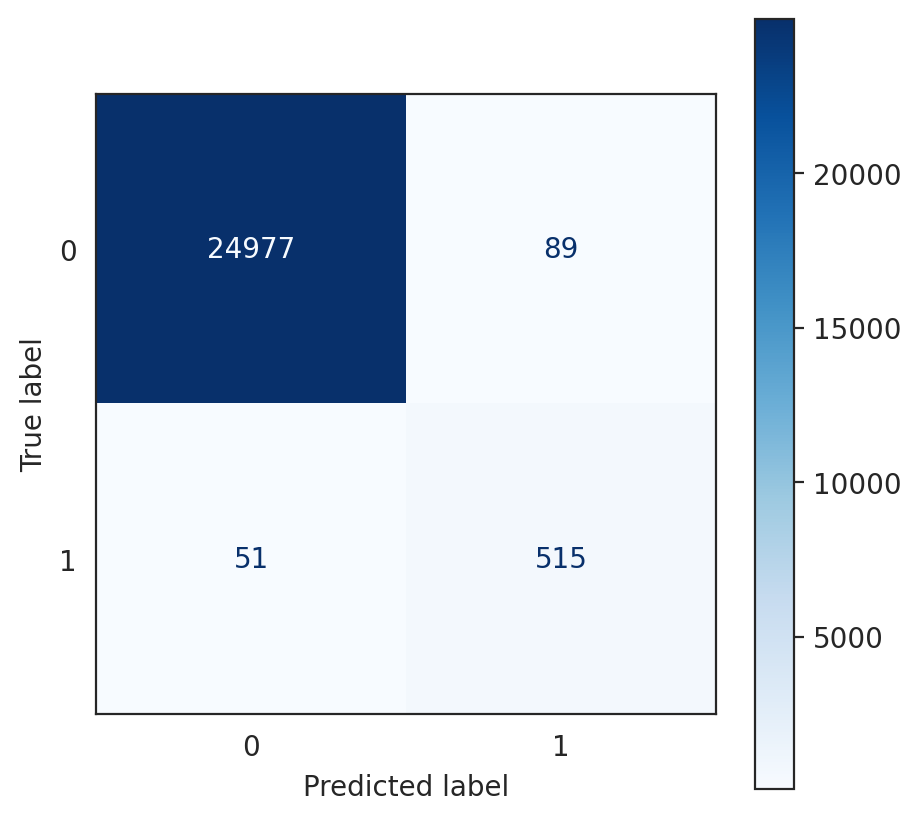

In [ ]:
plot_confusion_matrix(model, X_test, y_test)

<a id='4_2'></a>
## <p style="padding: 8px;color:white; display:fill;background-color:#aaaaaa; border-radius:5px; font-size:100%"> <b>kNN</b>

In [ ]:
%%time
from sklearn.neighbors import KNeighborsClassifier
start = time.time()
model = KNeighborsClassifier(n_neighbors=3).fit(X_train,y_train)
end_train = time.time()
y_predictions = model.predict(X_test) # These are the predictions from the test data.
end_predict = time.time()

CPU times: user 47.7 s, sys: 0 ns, total: 47.7 s
Wall time: 49.3 s


In [ ]:
accuracy = accuracy_score(y_test, y_predictions)
recall = recall_score(y_test, y_predictions, average='weighted')
precision = precision_score(y_test, y_predictions, average='weighted')
f1s = f1_score(y_test, y_predictions, average='weighted')
f2_score = fbeta_score(y_test, y_predictions, beta=2, average='weighted')
auc_score = roc_auc_score(y_test, y_predictions, average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("F2-Score: "+ "{:.2%}".format(f2_score))
print("ROC AUC: "+ "{:.2%}".format(auc_score))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")

model_performance.loc['kNN'] = [accuracy, recall, precision, f1s, f2_score, auc_score, end_train-start,end_predict-end_train,end_predict-start]

Accuracy: 95.04%
Recall: 95.04%
Precision: 95.09%
F1-Score: 95.05%
time to train: 0.01 s
time to predict: 20.04 s
total: 20.05 s


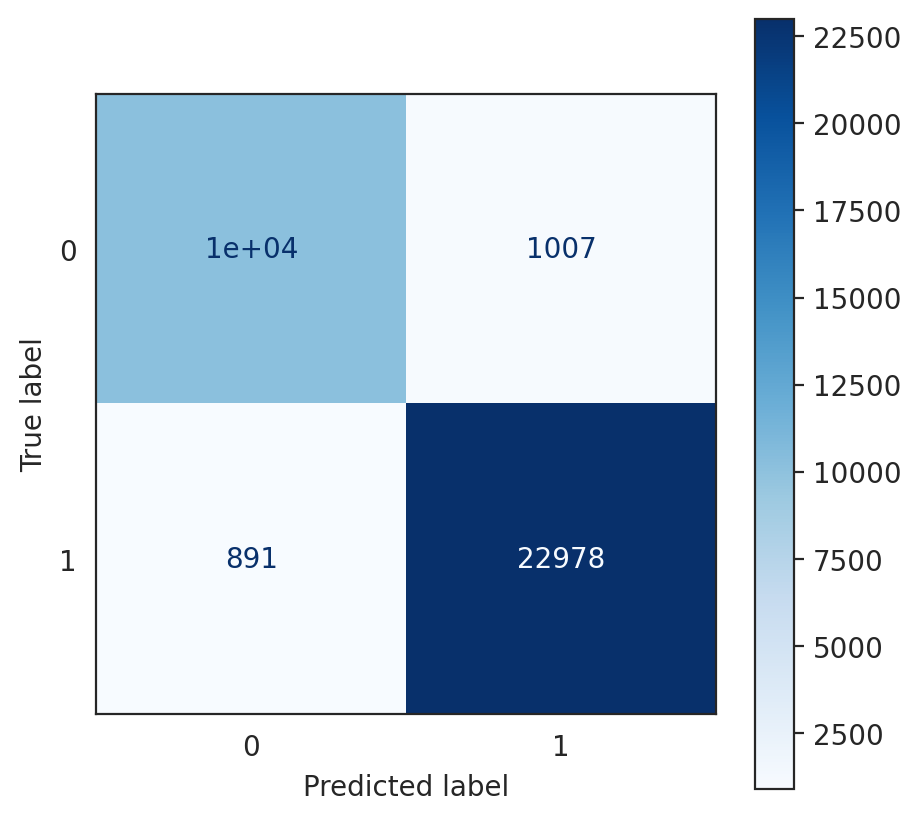

In [ ]:
plot_confusion_matrix(model, X_test, y_test)

<a id='4_3'></a>
## <p style="padding: 8px;color:white; display:fill;background-color:#aaaaaa; border-radius:5px; font-size:100%"> <b>Decision Tree</b>


In [ ]:
%%time
from sklearn.tree import DecisionTreeClassifier
start = time.time()
model = DecisionTreeClassifier().fit(X_train,y_train)
end_train = time.time()
y_predictions = model.predict(X_test) # These are the predictions from the test data.
end_predict = time.time()

CPU times: user 3.09 s, sys: 32.6 ms, total: 3.12 s
Wall time: 3.21 s


In [ ]:
accuracy = accuracy_score(y_test, y_predictions)
recall = recall_score(y_test, y_predictions, average='weighted')
precision = precision_score(y_test, y_predictions, average='weighted')
f1s = f1_score(y_test, y_predictions, average='weighted')
f2_score = fbeta_score(y_test, y_predictions, beta=2, average='weighted')
auc_score = roc_auc_score(y_test, y_predictions, average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("F2-Score: "+ "{:.2%}".format(f2_score))
print("ROC AUC: "+ "{:.2%}".format(auc_score))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")

model_performance.loc['Decision Tree'] = [accuracy, recall, precision, f1s, f2_score, auc_score, end_train-start,end_predict-end_train,end_predict-start]

Accuracy: 94.93%
Recall: 94.93%
Precision: 94.94%
F1-Score: 94.93%
time to train: 3.14 s
time to predict: 0.01 s
total: 3.15 s


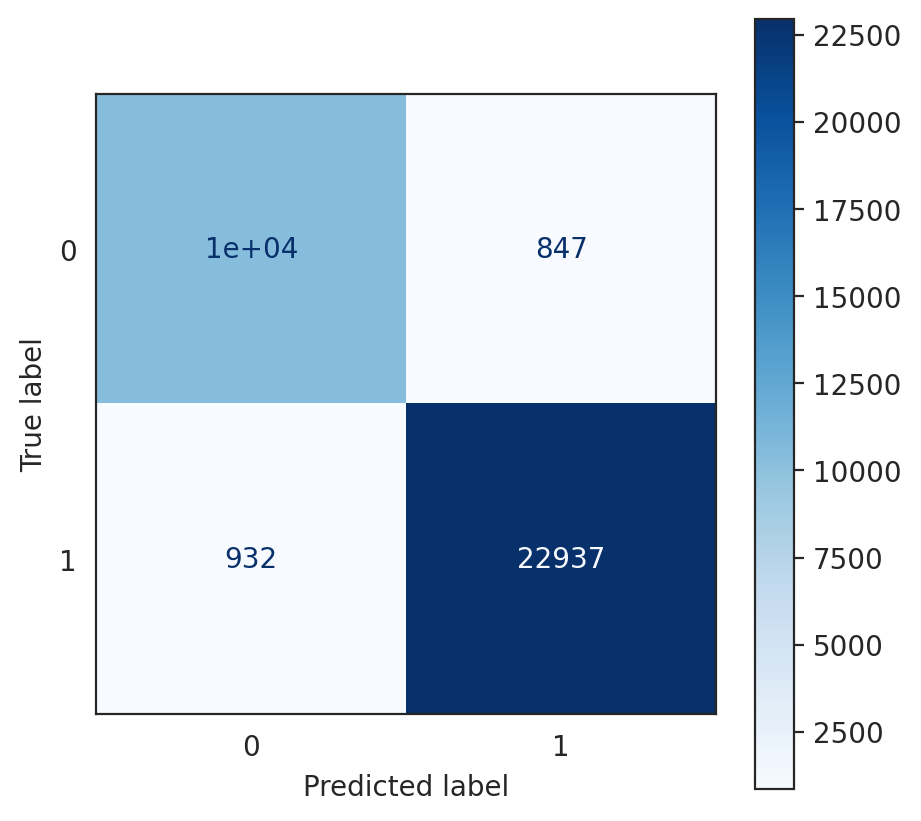

In [ ]:
plot_confusion_matrix(model, X_test, y_test)

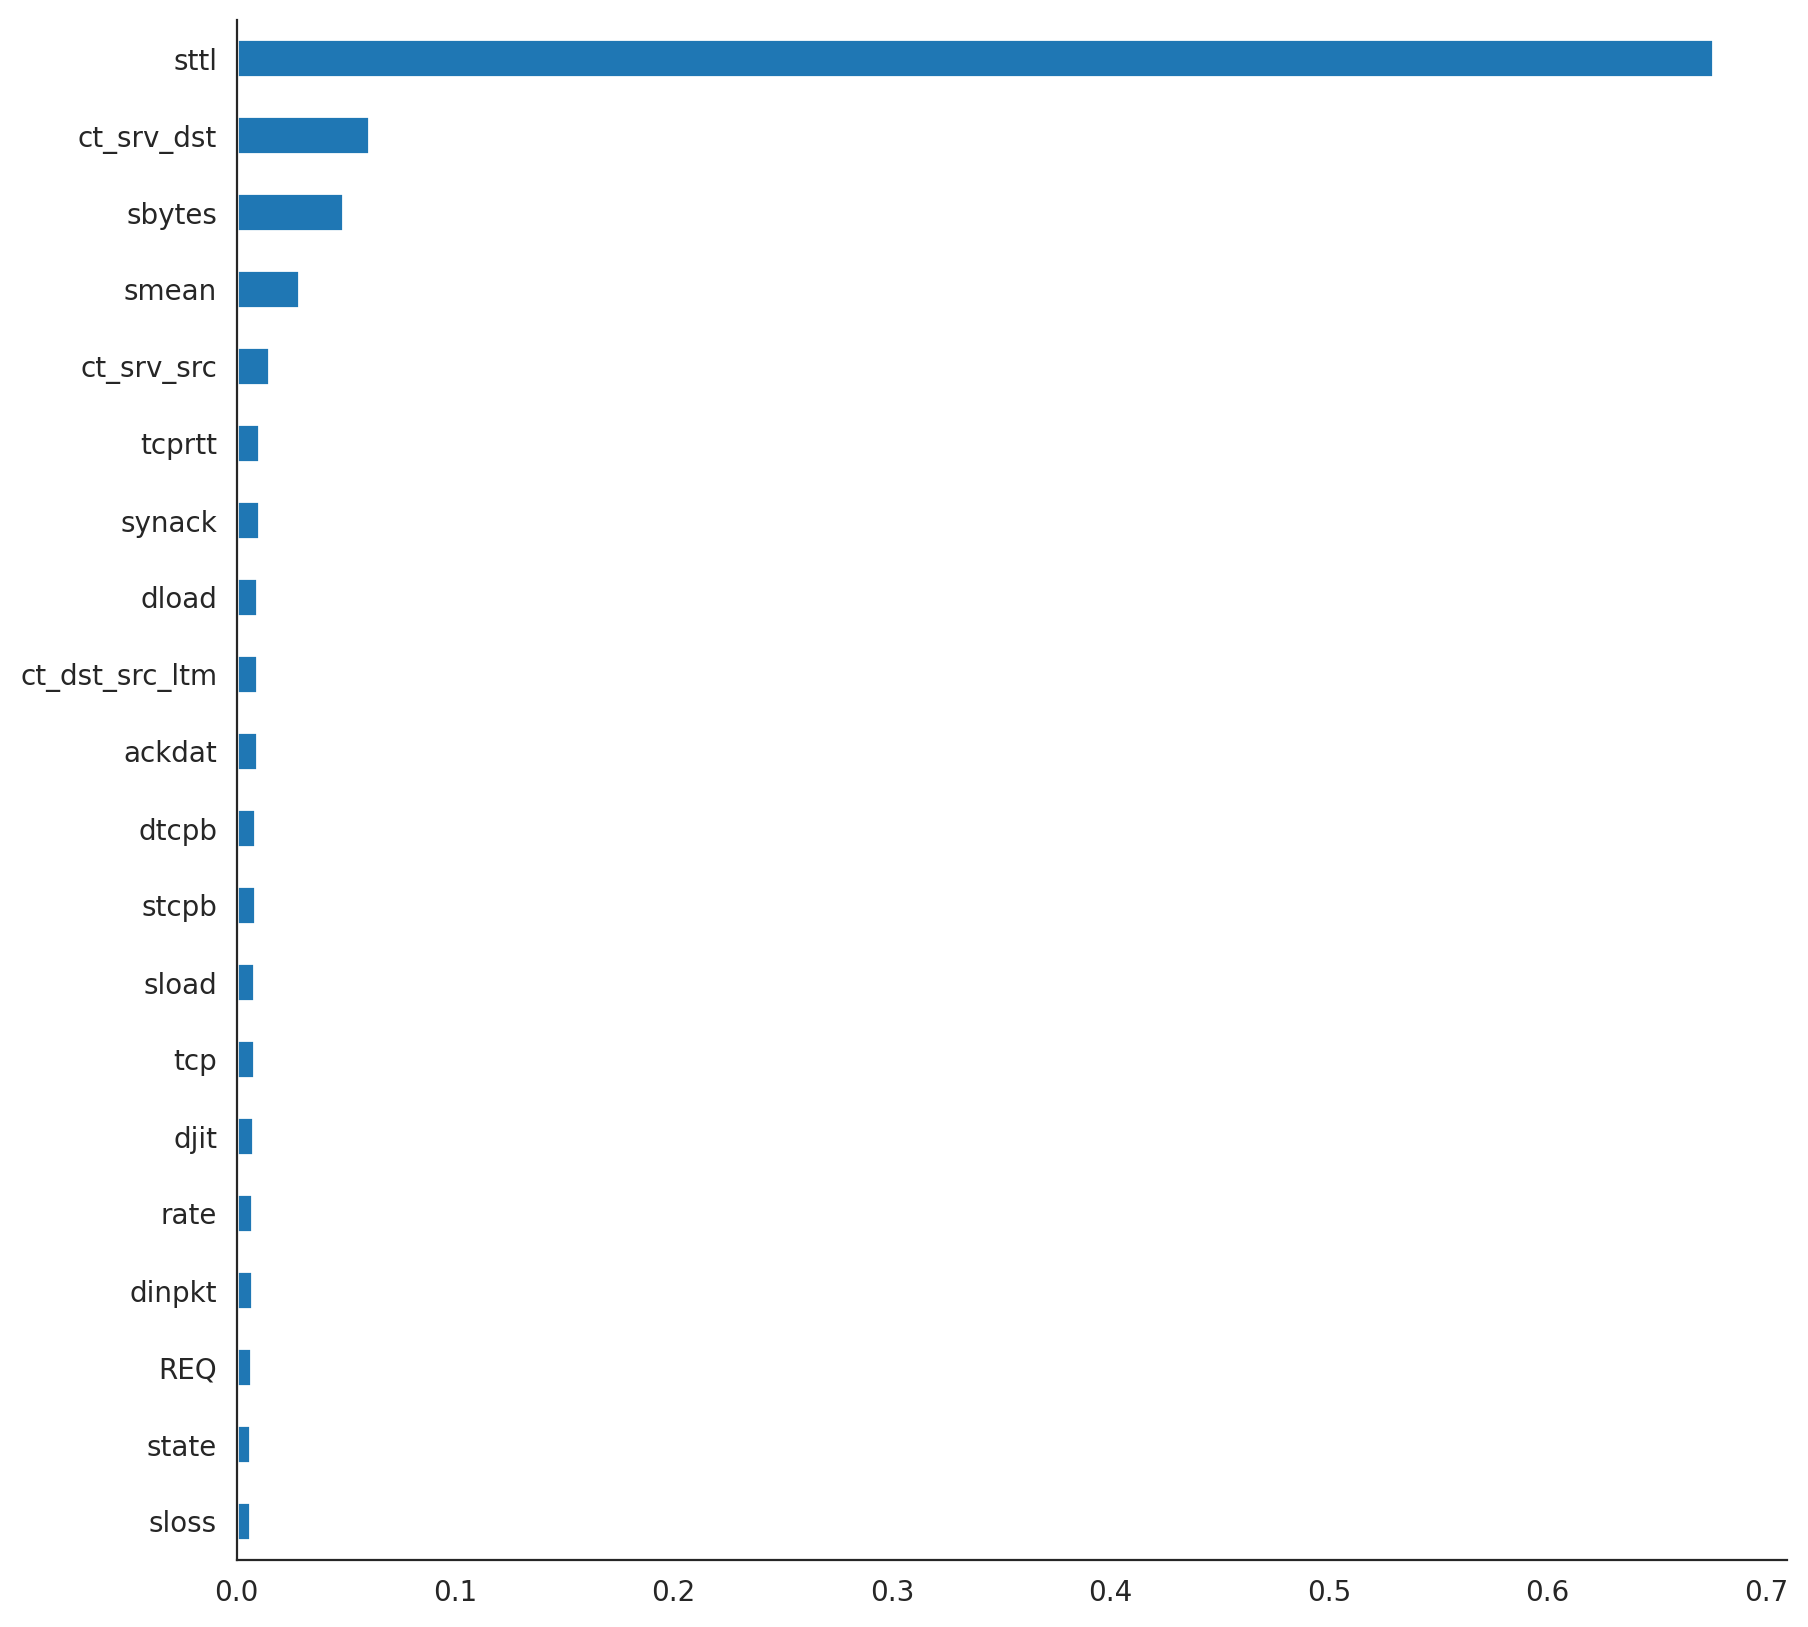

In [ ]:
plt.rcParams['figure.figsize']=10,10
sns.set_style("white")
feat_importances = pd.Series(model.feature_importances_, index=feature_names)
feat_importances = feat_importances.groupby(level=0).mean()
feat_importances.nlargest(20).plot(kind='barh').invert_yaxis()
sns.despine()
plt.show()

<a id='4_4'></a>
## <p style="padding: 8px;color:white; display:fill;background-color:#aaaaaa; border-radius:5px; font-size:100%"> <b>Extra Trees</b>

In [ ]:
%%time
from sklearn.ensemble import ExtraTreesClassifier
start = time.time()
model = ExtraTreesClassifier(random_state=0,n_jobs=-1).fit(X_train,y_train)
end_train = time.time()
y_predictions = model.predict(X_test) # These are the predictions from the test data.
end_predict = time.time()

CPU times: user 30 s, sys: 488 ms, total: 30.5 s
Wall time: 17.5 s


In [ ]:
accuracy = accuracy_score(y_test, y_predictions)
recall = recall_score(y_test, y_predictions, average='weighted')
precision = precision_score(y_test, y_predictions, average='weighted')
f1s = f1_score(y_test, y_predictions, average='weighted')
f2_score = fbeta_score(y_test, y_predictions, beta=2, average='weighted')
auc_score = roc_auc_score(y_test, y_predictions, average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("F2-Score: "+ "{:.2%}".format(f2_score))
print("ROC AUC: "+ "{:.2%}".format(auc_score))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")

model_performance.loc['Extra Trees'] = [accuracy, recall, precision, f1s, f2_score, auc_score, end_train-start,end_predict-end_train,end_predict-start]

Accuracy: 96.01%
Recall: 96.01%
Precision: 96.00%
F1-Score: 96.00%
time to train: 16.92 s
time to predict: 0.47 s
total: 17.39 s


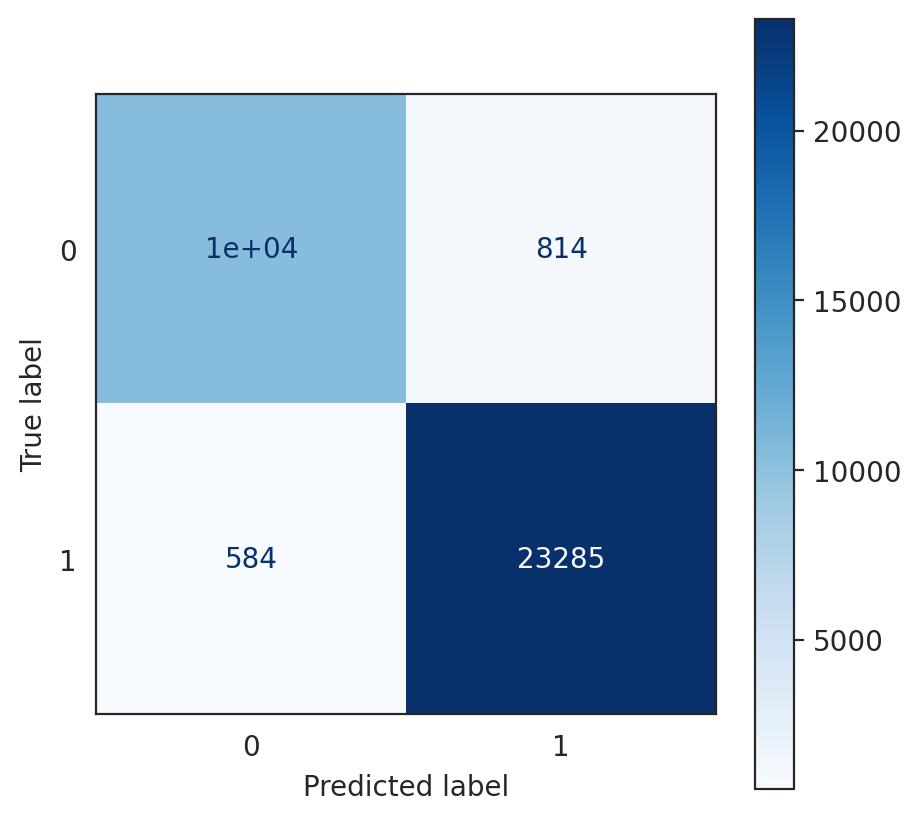

In [ ]:
plot_confusion_matrix(model, X_test, y_test)

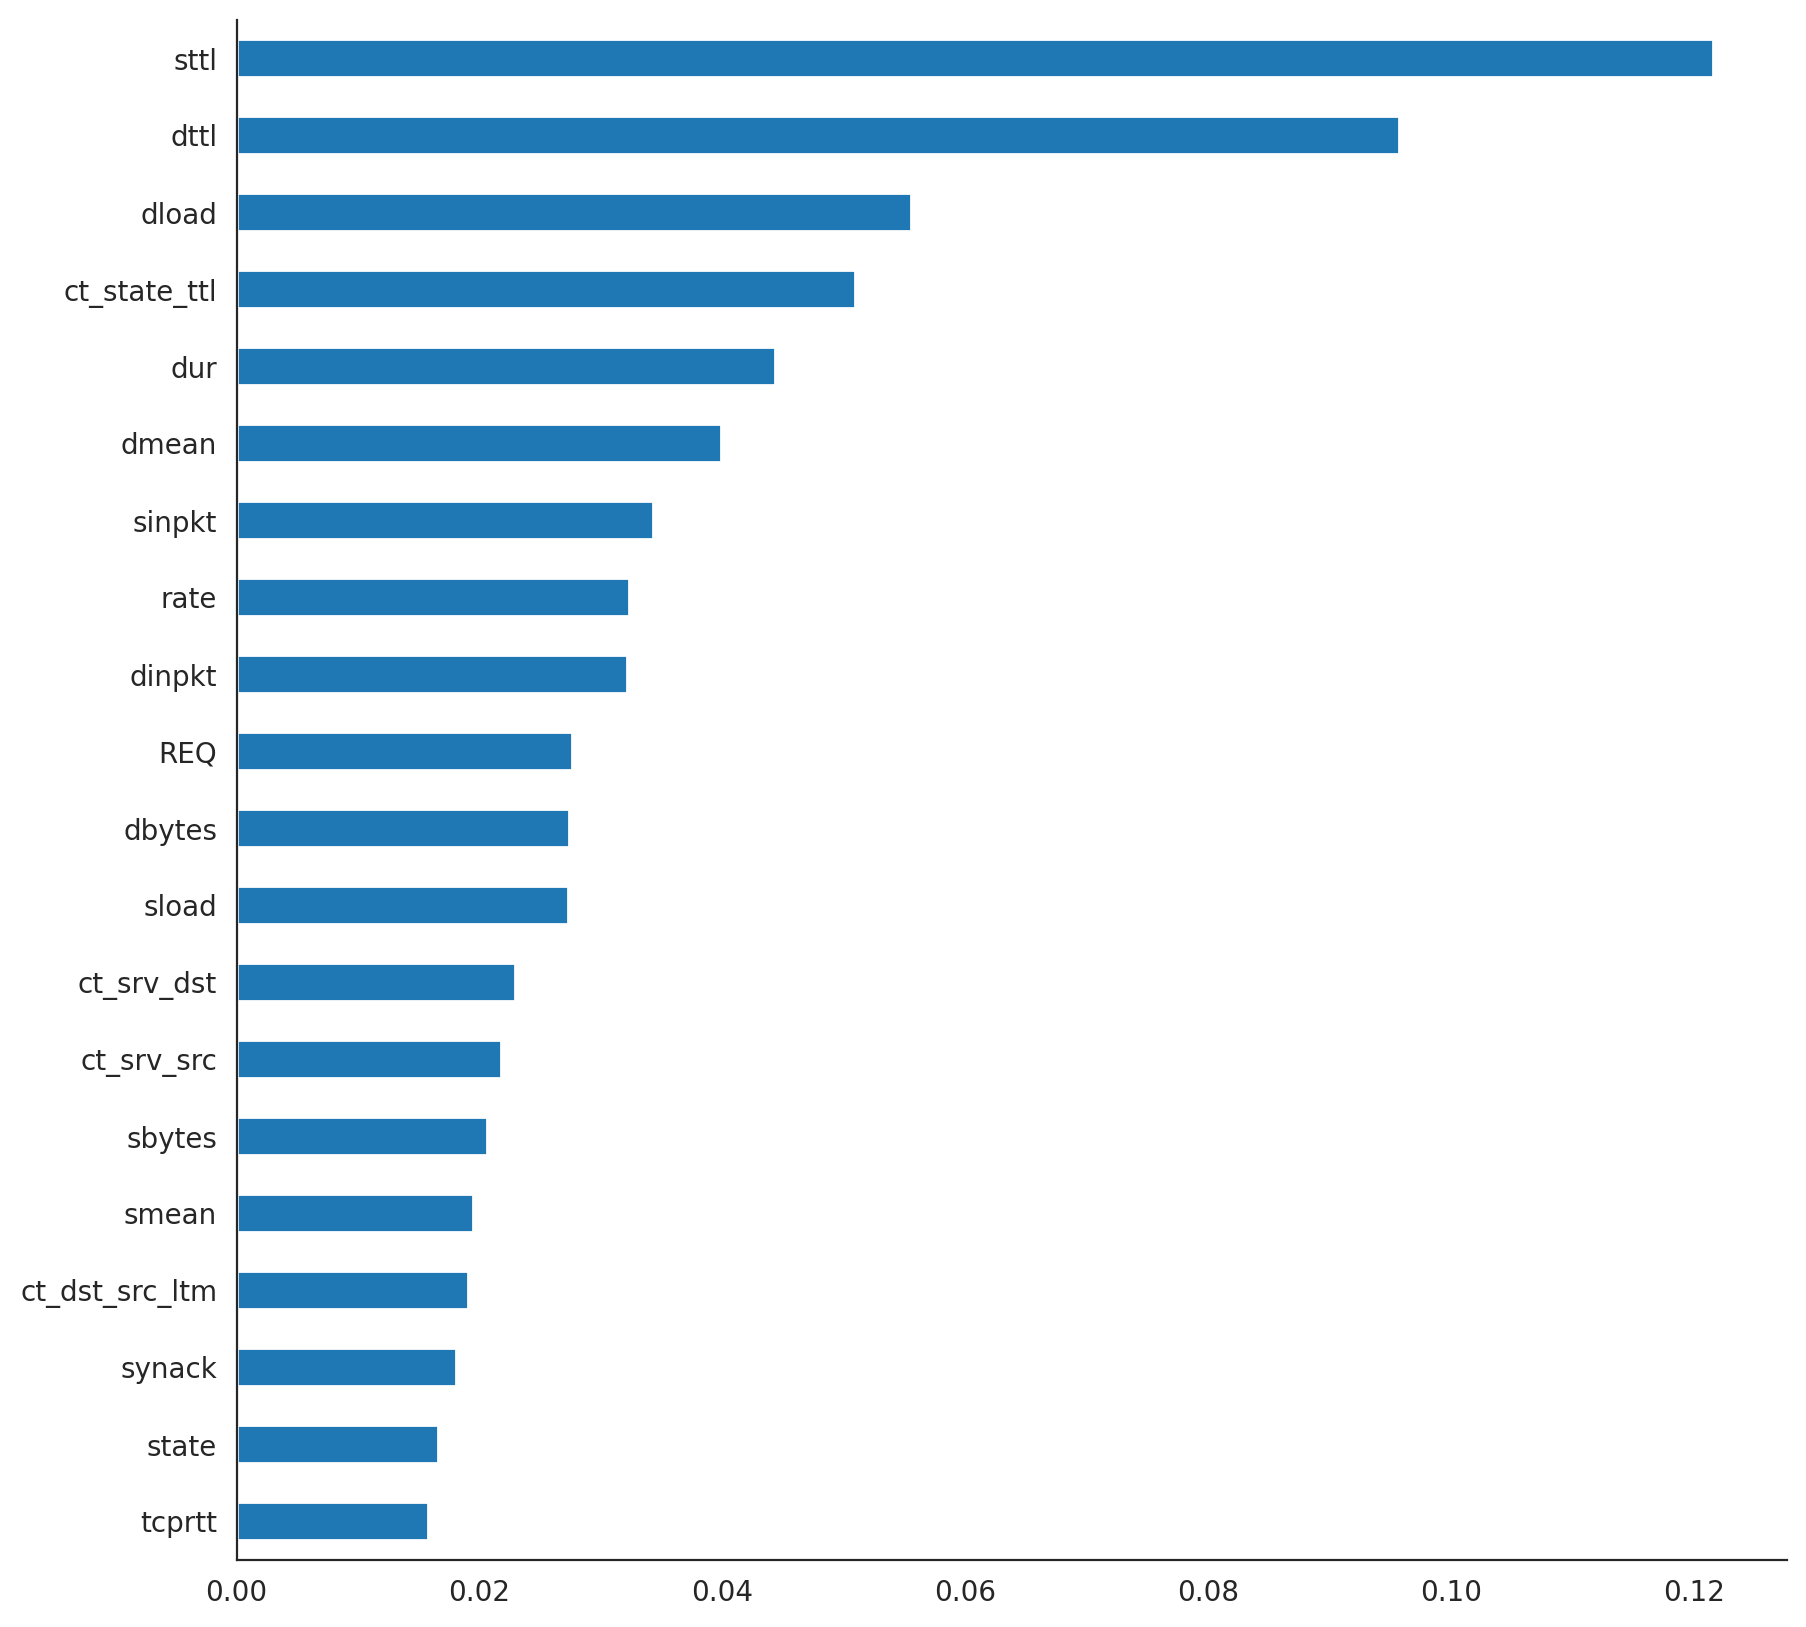

In [ ]:
plt.rcParams['figure.figsize']=10,10
sns.set_style("white")
sns.despine()
feat_importances = pd.Series(model.feature_importances_, index=feature_names)
feat_importances = feat_importances.groupby(level=0).mean()
feat_importances.nlargest(20).plot(kind='barh').invert_yaxis()
sns.despine()
plt.show()

<a id='4_5'></a>
## <p style="padding: 8px;color:white; display:fill;background-color:#aaaaaa; border-radius:5px; font-size:100%"> <b>Random Forest</b>

In [ ]:
%%time
from sklearn.ensemble import RandomForestClassifier
start = time.time()
model = RandomForestClassifier(n_estimators = 100,n_jobs=-1,random_state=0,bootstrap=True,).fit(X_train,y_train)
end_train = time.time()
y_predictions = model.predict(X_test) # These are the predictions from the test data.
end_predict = time.time()

CPU times: user 47.5 s, sys: 221 ms, total: 47.8 s
Wall time: 45 s


In [ ]:
accuracy = accuracy_score(y_test, y_predictions)
recall = recall_score(y_test, y_predictions, average='weighted')
precision = precision_score(y_test, y_predictions, average='weighted')
f1s = f1_score(y_test, y_predictions, average='weighted')
f2_score = fbeta_score(y_test, y_predictions, beta=2, average='weighted')
auc_score = roc_auc_score(y_test, y_predictions, average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("F2-Score: "+ "{:.2%}".format(f2_score))
print("ROC AUC: "+ "{:.2%}".format(auc_score))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")

model_performance.loc['Random Forest'] = [accuracy, recall, precision, f1s, f2_score, auc_score, end_train-start,end_predict-end_train,end_predict-start]

Accuracy: 95.95%
Recall: 95.95%
Precision: 95.93%
F1-Score: 95.93%
time to train: 44.27 s
time to predict: 0.78 s
total: 45.04 s


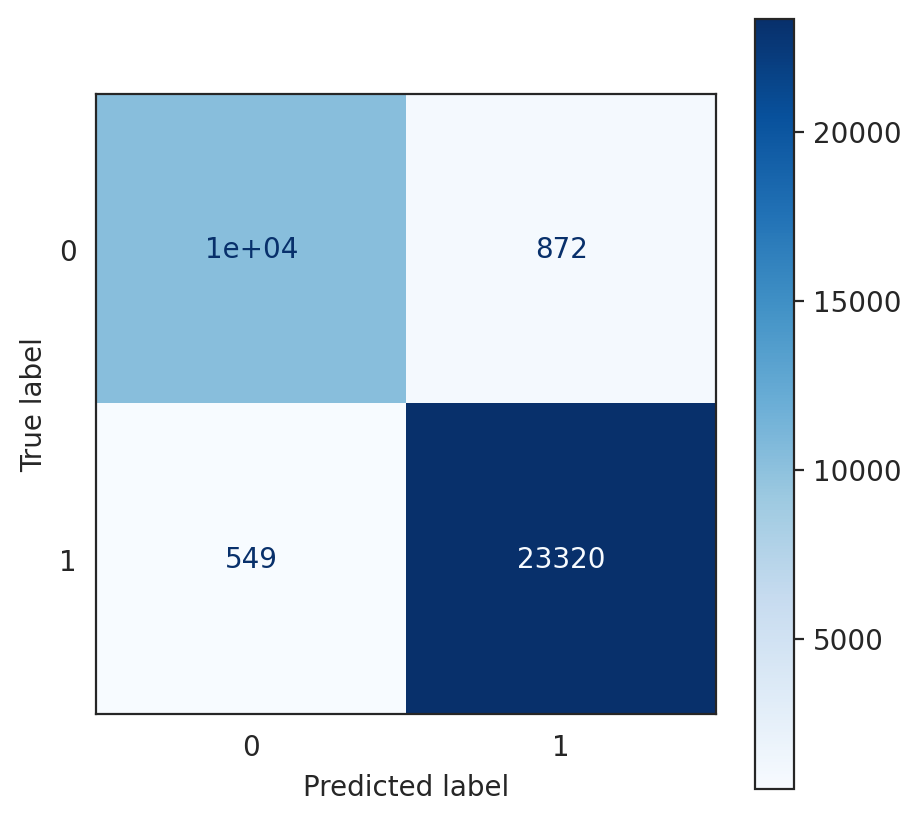

In [ ]:
plot_confusion_matrix(model, X_test, y_test)

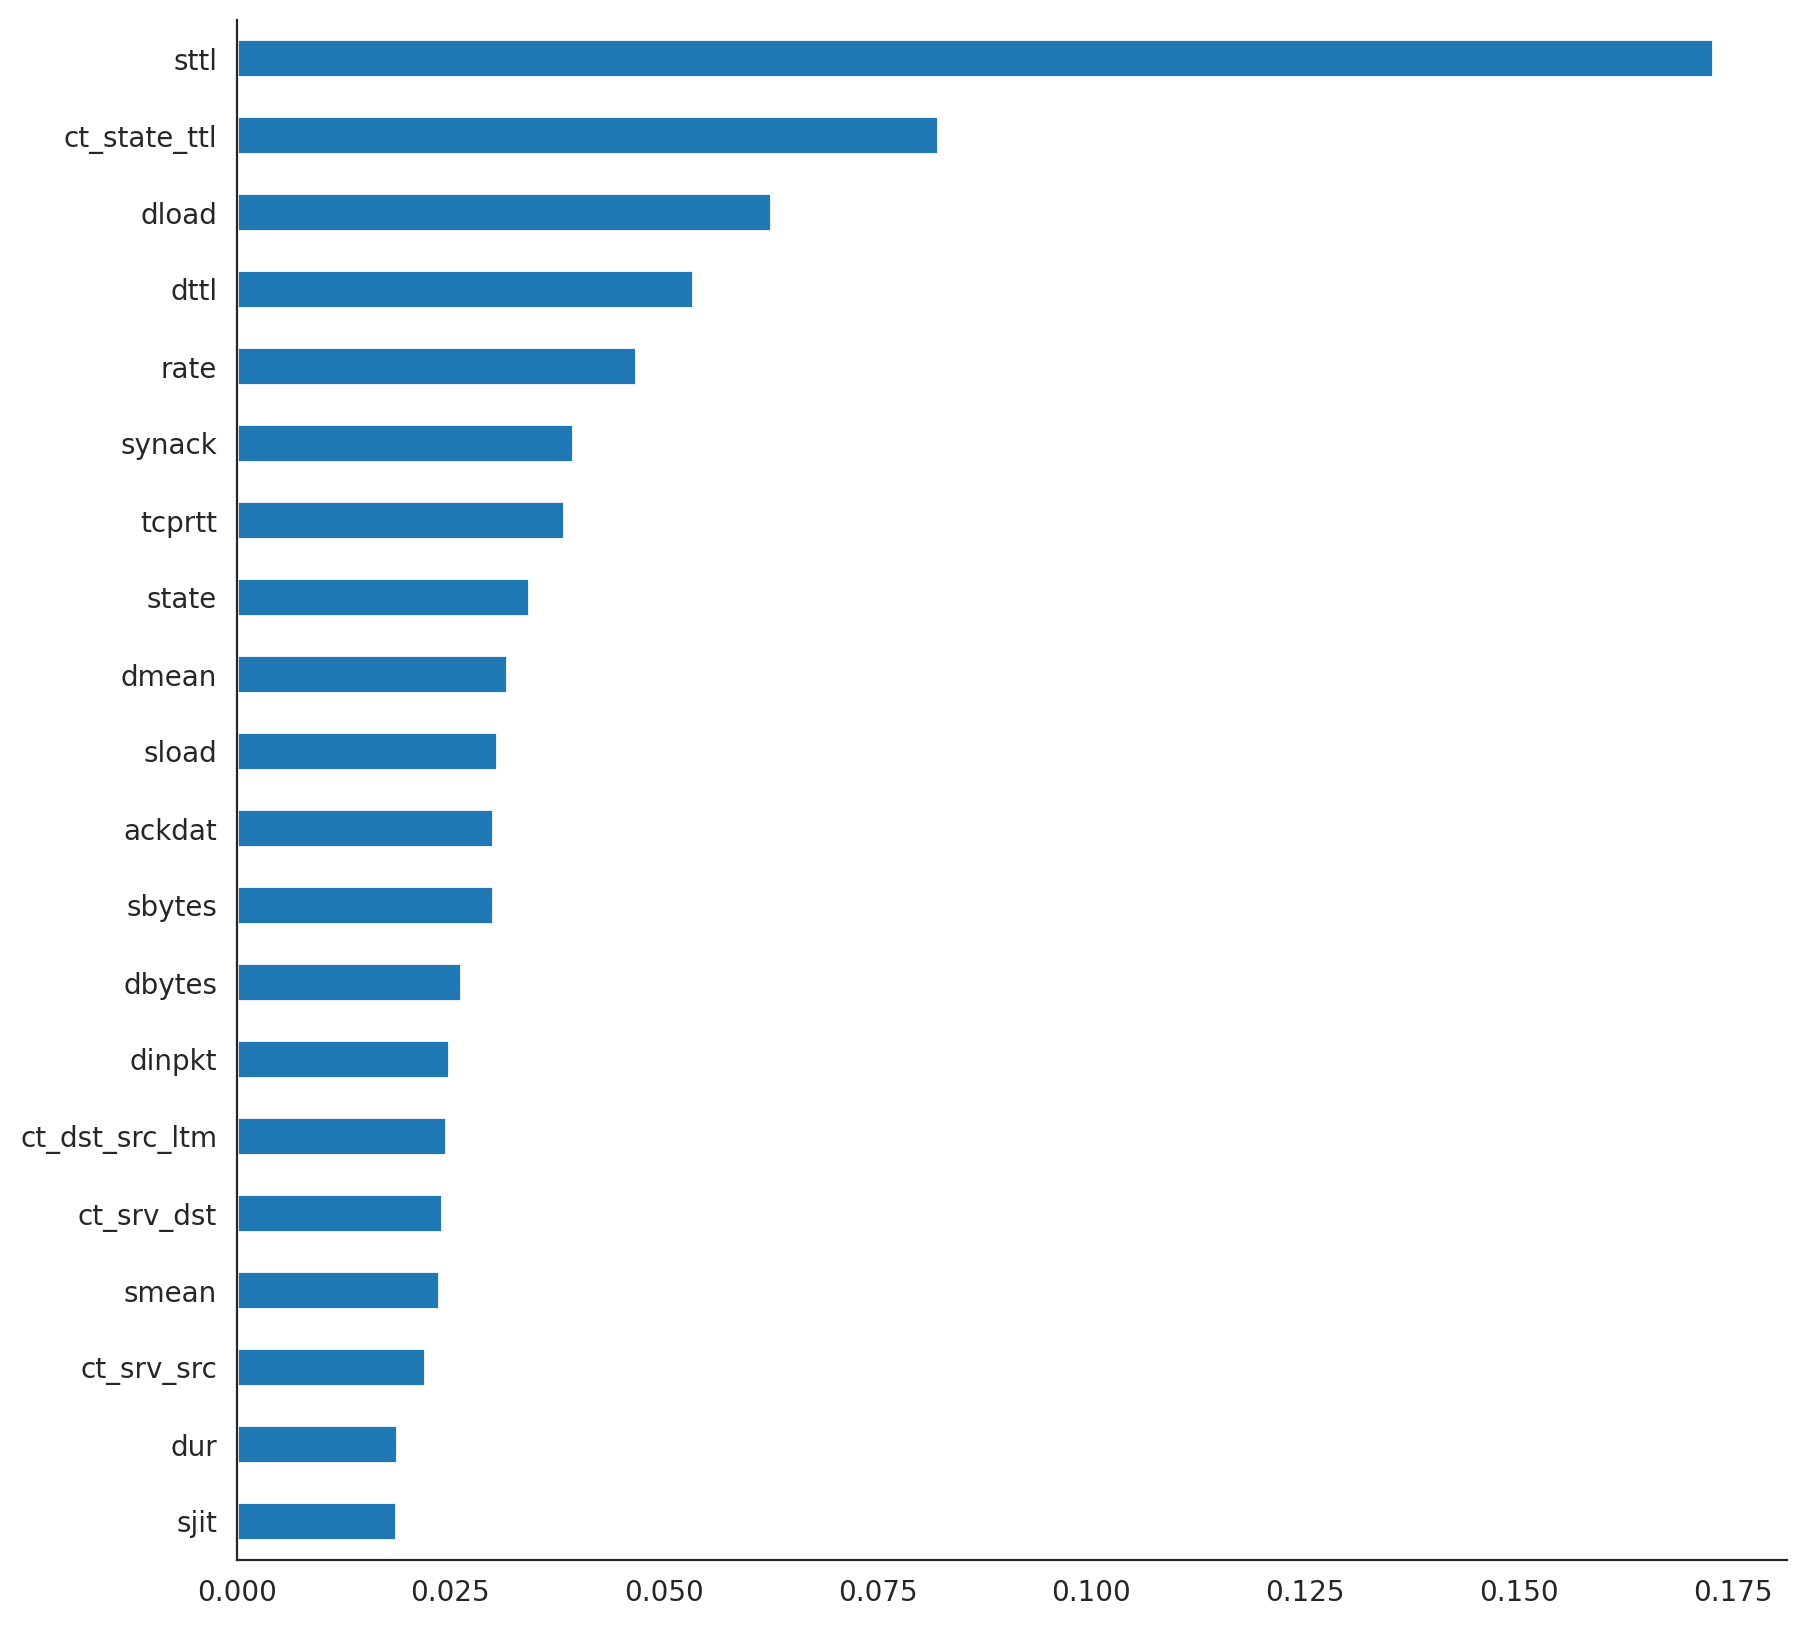

In [ ]:
plt.rcParams['figure.figsize']=10,10
sns.set_style("white")
feat_importances = pd.Series(model.feature_importances_, index=feature_names)
feat_importances = feat_importances.groupby(level=0).mean()
feat_importances.nlargest(20).plot(kind='barh').invert_yaxis()
sns.despine()
plt.show()

<a id='4_6'></a>
## <p style="padding: 8px;color:white; display:fill;background-color:#aaaaaa; border-radius:5px; font-size:100%"> <b>Gradient Boosting Classifier</b>

In [ ]:
%%time
from sklearn.ensemble import GradientBoostingClassifier
start = time.time()
model = GradientBoostingClassifier().fit(X_train,y_train)
end_train = time.time()
y_predictions = model.predict(X_test) # These are the predictions from the test data.
end_predict = time.time()

CPU times: user 1min 34s, sys: 81.7 ms, total: 1min 34s
Wall time: 1min 40s


In [ ]:
accuracy = accuracy_score(y_test, y_predictions)
recall = recall_score(y_test, y_predictions, average='weighted')
precision = precision_score(y_test, y_predictions, average='weighted')
f1s = f1_score(y_test, y_predictions, average='weighted')
f2_score = fbeta_score(y_test, y_predictions, beta=2, average='weighted')
auc_score = roc_auc_score(y_test, y_predictions, average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("F2-Score: "+ "{:.2%}".format(f2_score))
print("ROC AUC: "+ "{:.2%}".format(auc_score))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")

model_performance.loc['Gradient Boosting Classifier'] = [accuracy, recall, precision, f1s, f2_score, auc_score, end_train-start,end_predict-end_train,end_predict-start]


Accuracy: 99.57%
Recall: 99.57%
Precision: 99.57%
F1-Score: 99.57%
F2-Score: 99.57%
ROC AUC: 94.69%
time to train: 100.44 s
time to predict: 0.03 s
total: 100.47 s


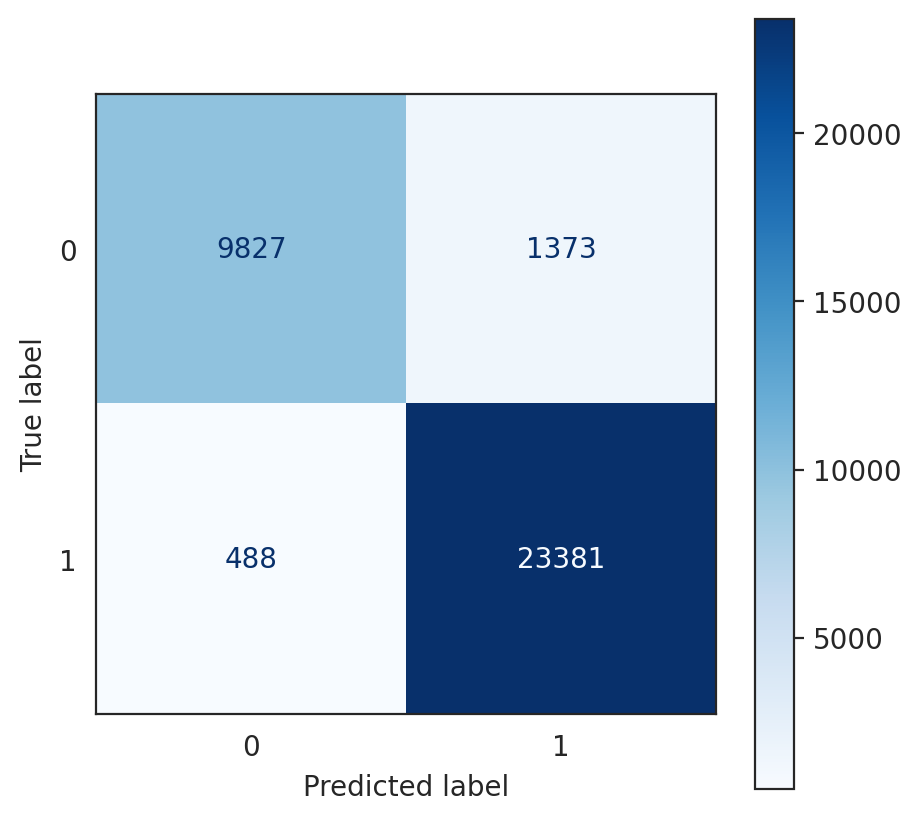

In [ ]:
plot_confusion_matrix(model, X_test, y_test)

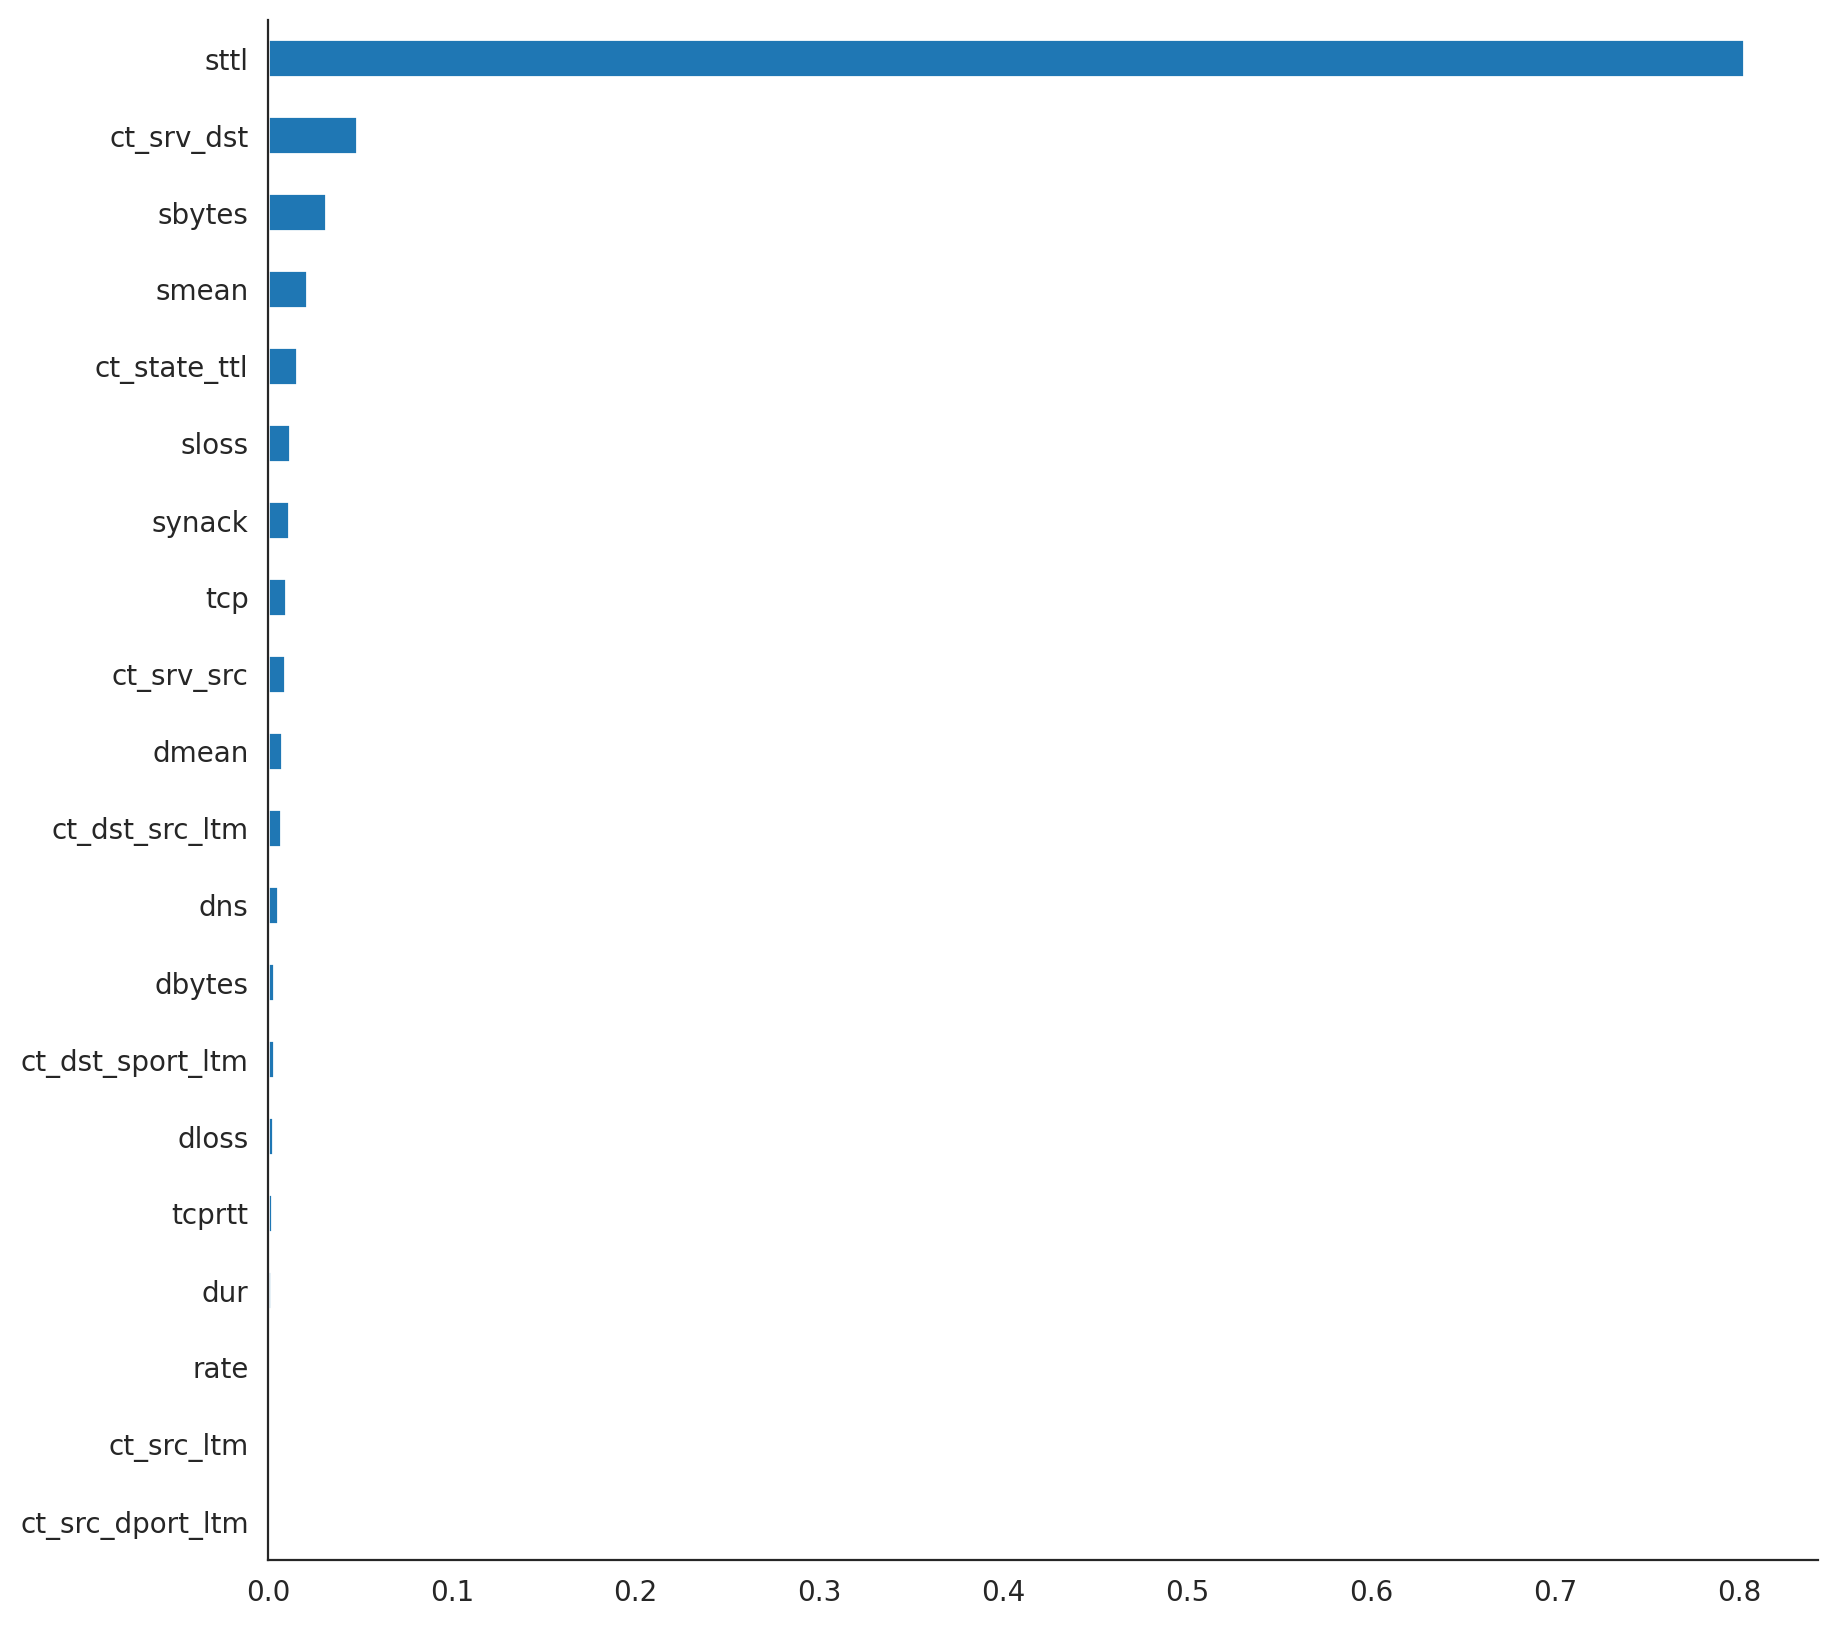

In [ ]:
plt.rcParams['figure.figsize']=10,10
sns.set_style("white")
feat_importances = pd.Series(model.feature_importances_, index=feature_names)
feat_importances = feat_importances.groupby(level=0).mean()
feat_importances.nlargest(20).plot(kind='barh').invert_yaxis()
sns.despine()
plt.show()

<a id='4_7'></a>
## <p style="padding: 8px;color:white; display:fill;background-color:#aaaaaa; border-radius:5px; font-size:100%"> <b>Neural Network MLP</b>

In [ ]:
%%time
from sklearn.neural_network import MLPClassifier
start = time.time()
model = MLPClassifier(hidden_layer_sizes = (20,20,),
                      activation='relu',
                      solver='adam',
                      batch_size=2000,
                      verbose=0).fit(X_train,y_train)
end_train = time.time()
y_predictions = model.predict(X_test) # These are the predictions from the test data.
end_predict = time.time()

CPU times: user 1min 46s, sys: 1min 3s, total: 2min 50s
Wall time: 43.9 s


In [ ]:
accuracy = accuracy_score(y_test, y_predictions)
recall = recall_score(y_test, y_predictions, average='weighted')
precision = precision_score(y_test, y_predictions, average='weighted')
f1s = f1_score(y_test, y_predictions, average='weighted')
f2_score = fbeta_score(y_test, y_predictions, beta=2, average='weighted')
auc_score = roc_auc_score(y_test, y_predictions, average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("F2-Score: "+ "{:.2%}".format(f2_score))
print("ROC AUC: "+ "{:.2%}".format(auc_score))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")

model_performance.loc['MLP'] = [accuracy, recall, precision, f1s, f2_score, auc_score, end_train-start,end_predict-end_train,end_predict-start]


Accuracy: 96.25%
Recall: 96.25%
Precision: 96.26%
F1-Score: 96.25%
time to train: 43.92 s
time to predict: 0.02 s
total: 43.94 s


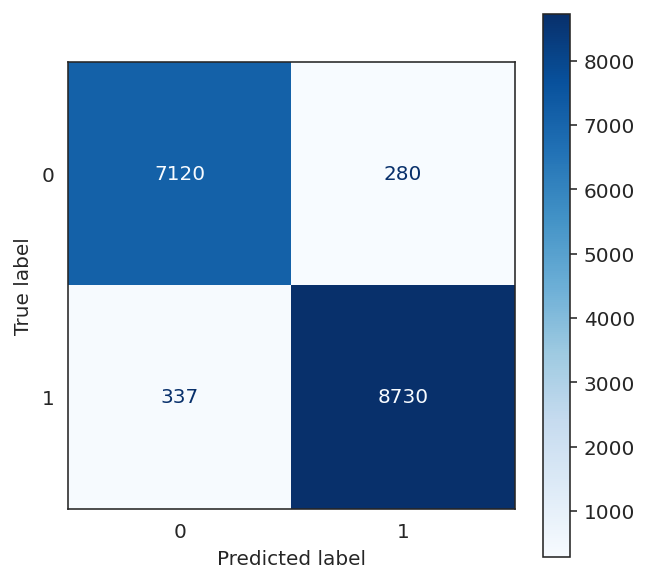

In [ ]:
plt.rcParams['figure.figsize']=5,5
sns.set_style("white")
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)
plt.show()

In [ ]:
model_performance.style.background_gradient(cmap='coolwarm').format({'Accuracy': '{:.2%}',
                                                                     'Precision': '{:.2%}',
                                                                     'Recall': '{:.2%}',
                                                                     'F1-Score': '{:.2%}',
                                                                     'time to train':'{:.1f}',
                                                                     'time to predict':'{:.1f}',
                                                                     'total time':'{:.1f}',
                                                                     })

,Accuracy,Recall,Precision,F1-Score,time to train,time to predict,total time
Logistic,92.80%,92.80%,92.83%,92.80%,1.7,0.0,1.7
kNN,95.04%,95.04%,95.09%,95.05%,0.0,20.0,20.0
Decision Tree,96.38%,96.38%,96.38%,96.38%,1.4,0.0,1.4
Extra Trees,97.53%,97.53%,97.55%,97.53%,3.7,0.2,3.9
Random Forest,97.68%,97.68%,97.69%,97.68%,5.5,0.2,5.7
Gradient Boosting Classifier,95.85%,95.85%,95.86%,95.85%,46.9,0.0,47.0
MLP,96.25%,96.25%,96.26%,96.25%,43.9,0.0,43.9


<a id='4_8'></a>
## <p style="padding: 8px;color:white; display:fill;background-color:#aaaaaa; border-radius:5px; font-size:100%"> <b>Neural Network MLP (Keras)</b>

In [ ]:
#Import libraries that will allow you to use keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, GRU
from keras import metrics
!pip install keras-metrics #It doesn't come with Google Colab
import keras_metrics as km #when compiling
import keras
import numpy as np
from numpy import array

In [ ]:
##from keras import backend as K

import tensorflow.keras.backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [ ]:
#Build the feed forward neural network model
def build_model():
    model = Sequential()
    model.add(Dense(20, input_dim=45, activation='relu')) ## после того как убрал фичи скоррелированные
    # было
    #model.add(Dense(20, input_dim=56, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(20, activation='softmax')) #for multiclass classification
    #Compile the model

    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam',
                  metrics=['accuracy',f1_m,precision_m, recall_m]
                 )
    return model

#institate the model
model = build_model()

#fit the model
start = time.time()
# добавил .astype('float64') чтобы нормально считалось на этой версии Keras
model.fit(X_train, y_train.astype('float64'), epochs=200, batch_size=2000,verbose=2)
end_train = time.time()

y_predictions = model.predict(X_test) # These are the predictions from the test data.
end_predict = time.time()

Epoch 1/200
52/52 - 3s - 67ms/step - accuracy: 0.6491 - f1_m: 0.0147 - loss: 1.1686 - precision_m: 0.0420 - recall_m: 0.1614
Epoch 2/200
52/52 - 1s - 17ms/step - accuracy: 0.9818 - f1_m: 0.0320 - loss: 0.0807 - precision_m: 0.0164 - recall_m: 0.7350
Epoch 3/200
52/52 - 1s - 16ms/step - accuracy: 0.9867 - f1_m: 0.0306 - loss: 0.0362 - precision_m: 0.0157 - recall_m: 0.6991
Epoch 4/200
52/52 - 0s - 5ms/step - accuracy: 0.9906 - f1_m: 0.0415 - loss: 0.0228 - precision_m: 0.0212 - recall_m: 0.9562
Epoch 5/200
52/52 - 0s - 6ms/step - accuracy: 0.9920 - f1_m: 0.0419 - loss: 0.0184 - precision_m: 0.0214 - recall_m: 0.9686
Epoch 6/200
52/52 - 0s - 5ms/step - accuracy: 0.9936 - f1_m: 0.0428 - loss: 0.0160 - precision_m: 0.0219 - recall_m: 0.9891
Epoch 7/200
52/52 - 0s - 6ms/step - accuracy: 0.9942 - f1_m: 0.0434 - loss: 0.0145 - precision_m: 0.0222 - recall_m: 0.9975
Epoch 8/200
52/52 - 0s - 6ms/step - accuracy: 0.9944 - f1_m: 0.0427 - loss: 0.0136 - precision_m: 0.0218 - recall_m: 0.9969
Epoch

In [ ]:
#Evaluate the neural network
loss, accuracy, f1s, precision, recall = model.evaluate(X_test, y_test)
end_predict = time.time()
model_performance.loc['MLP (Keras)'] = [accuracy, accuracy, accuracy, accuracy,end_train-start,end_predict-end_train,end_predict-start]

515/515 [==============================] - 1s 2ms/step - loss: 0.0955 - accuracy: 0.9610 - f1_m: 0.7060 - precision_m: 0.5505 - recall_m: 1.0000


In [ ]:
### ПОПЫТКИ ПОССЧИТАТЬ ROC AUC

In [ ]:
# Custom metric for F2-score
def f2_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 5 * ((precision * recall) / (4 * precision + recall + K.epsilon()))

def calculate_roc_auc(model, X_test, y_test):
    y_pred_proba = model.predict(X_test)
    return roc_auc_score(y_test, y_pred_proba)

In [ ]:
# Build the feed forward neural network model
def build_model():
    model = Sequential()
    model.add(Dense(20, input_dim=45, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))  # сигмоида для бинарной классификации, вариант выше - для многомерной, тяжело AUC считать
    # Compile the model
    model.compile(loss='binary_crossentropy', optimizer='adam', ## для бинарной
                  metrics=['accuracy', f1_m, precision_m, recall_m, f2_m])
    return model

# Instantiate the model
model = build_model()

# Fit the model
start = time.time()
model.fit(X_train, y_train.astype('float64'), epochs=200, batch_size=2000, verbose=2)
end_train = time.time()

y_predictions = model.predict(X_test) # These are the predictions from the test data.
end_predict = time.time()

Epoch 1/200
52/52 - 2s - 41ms/step - accuracy: 0.9779 - f1_m: 0.0000e+00 - f2_m: 0.0000e+00 - loss: 0.1127 - precision_m: 0.0000e+00 - recall_m: 0.0000e+00
Epoch 2/200
52/52 - 0s - 6ms/step - accuracy: 0.9818 - f1_m: 0.3034 - f2_m: 0.2722 - loss: 0.0357 - precision_m: 0.6482 - recall_m: 0.2578
Epoch 3/200
52/52 - 0s - 5ms/step - accuracy: 0.9930 - f1_m: 0.8496 - f2_m: 0.8882 - loss: 0.0191 - precision_m: 0.7944 - recall_m: 0.9169
Epoch 4/200
52/52 - 0s - 5ms/step - accuracy: 0.9938 - f1_m: 0.8700 - f2_m: 0.9233 - loss: 0.0161 - precision_m: 0.7950 - recall_m: 0.9633
Epoch 5/200
52/52 - 0s - 6ms/step - accuracy: 0.9939 - f1_m: 0.8718 - f2_m: 0.9222 - loss: 0.0147 - precision_m: 0.8005 - recall_m: 0.9598
Epoch 6/200
52/52 - 0s - 4ms/step - accuracy: 0.9941 - f1_m: 0.8763 - f2_m: 0.9236 - loss: 0.0138 - precision_m: 0.8094 - recall_m: 0.9588
Epoch 7/200
52/52 - 0s - 6ms/step - accuracy: 0.9943 - f1_m: 0.8812 - f2_m: 0.9256 - loss: 0.0130 - precision_m: 0.8176 - recall_m: 0.9585
Epoch 8/20

In [ ]:
# Evaluate the model
loss, accuracy, f1s, precision, recall, f2s = model.evaluate(X_test.astype('float64'), y_test.astype('float64'))
# Calculate ROC AUC score
#roc_auc = calculate_roc_auc(model, X_test, y_test)
roc_auc = roc_auc_score(y_test, y_predictions)

801/801 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9954 - f1_m: 0.4596 - f2_m: 0.4598 - loss: 0.0103 - precision_m: 0.4647 - recall_m: 0.4613


In [ ]:
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")
print(f"F1-score: {f1s}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F2-score (calculated separately): {f2s}")
print(f"ROC AUC (calculated separately): {roc_auc}")

#model_performance.loc['MLP'] = [accuracy, recall, precision, f1s, f2_score, auc_score, end_train-start,end_predict-end_train,end_predict-start]

model_performance.loc['MLP (Keras)'] = [accuracy, recall, precision, f1s, f2s, roc_auc, end_train-start,end_predict-end_train,end_predict-start]

Loss: 0.010862539522349834
Accuracy: 0.9955524206161499
F1-score: 0.4467093348503113
Precision: 0.452143132686615
Recall: 0.4488139748573303
F2-score (calculated separately): 0.44702842831611633
ROC AUC (calculated separately): 0.999359288651106


In [ ]:
### потом надо добавить строчку

<a id='4_9'></a>
## <p style="padding: 8px;color:white; display:fill;background-color:#aaaaaa; border-radius:5px; font-size:100%"> <b>GRU (Keras)</b>

In [ ]:
#Build the neural network model
def build_model():
    model = Sequential()
    model.add(GRU(20, return_sequences=True,input_shape=(1,45)))
    #model.add(GRU(20, return_sequences=True,input_shape=(1,56)))
    model.add(GRU(20, return_sequences=True))
    #model.add(Dense(10, activation='softmax'))
    model.add(Dense(1, activation='sigmoid')) #for multiclass classification # softmax для сигмоиды поставил 1 а не 10 в выходной слой
    #Compile the model
    model.compile(loss='binary_crossentropy', optimizer='adam',
                  #loss='sparse_categorical_crossentropy', optimizer='adam',
                  # metrics=['accuracy',f1_m,precision_m, recall_m]

                  metrics=['accuracy', f1_m, precision_m, recall_m, f2_m]
                  #metrics=['accuracy']
                 )
    return model

#The GRU input layer must be 3D.
#The meaning of the 3 input dimensions are: samples, time steps, and features.
#reshape input data
X_train_array = array(X_train) #array has been declared in the previous cell
print(len(X_train_array))
X_train_reshaped = X_train_array.reshape(X_train_array.shape[0],1,45) # было 56

#reshape output data
X_test_array=  array(X_test)
X_test_reshaped = X_test_array.reshape(X_test_array.shape[0],1,45) # было 56


#institate the model
model = build_model()

start = time.time()
#fit the model
model.fit(X_train_reshaped, y_train.astype('float64'), epochs=200, batch_size=2000,verbose=2)
end_train = time.time()
y_predictions = model.predict(X_test_reshaped).ravel()
#y_predictions = model.predict(X_test_reshaped) # These are the predictions from the test data.
end_predict = time.time()

102526
Epoch 1/200
52/52 - 12s - 239ms/step - accuracy: 0.8972 - f1_m: 15.8528 - f2_m: 28.4057 - loss: 0.4620 - precision_m: 28.9038 - recall_m: 164.8077
Epoch 2/200
52/52 - 3s - 51ms/step - accuracy: 0.9803 - f1_m: 8.9426 - f2_m: 6.1841 - loss: 0.1185 - precision_m: 42.8462 - recall_m: 5.1346
Epoch 3/200
52/52 - 4s - 69ms/step - accuracy: 0.9884 - f1_m: 37.6824 - f2_m: 35.8252 - loss: 0.0429 - precision_m: 43.5385 - recall_m: 34.9038
Epoch 4/200
52/52 - 3s - 48ms/step - accuracy: 0.9935 - f1_m: 47.2465 - f2_m: 49.8522 - loss: 0.0268 - precision_m: 43.5385 - recall_m: 51.7885
Epoch 5/200
52/52 - 3s - 54ms/step - accuracy: 0.9941 - f1_m: 47.6035 - f2_m: 50.4749 - loss: 0.0211 - precision_m: 43.5385 - recall_m: 52.6154
Epoch 6/200
52/52 - 4s - 83ms/step - accuracy: 0.9943 - f1_m: 47.4714 - f2_m: 50.2356 - loss: 0.0182 - precision_m: 43.5385 - recall_m: 52.2885
Epoch 7/200
52/52 - 2s - 47ms/step - accuracy: 0.9943 - f1_m: 47.3038 - f2_m: 49.9366 - loss: 0.0163 - precision_m: 43.5385 - rec

ValueError: Exception encountered when calling Sequential.call().

[1mInvalid input shape for input Tensor("data:0", shape=(32, 45), dtype=float32). Expected shape (None, 1, 45), but input has incompatible shape (32, 45)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(32, 45), dtype=float32)
  • training=False
  • mask=None

In [ ]:
# Evaluate the model
loss, accuracy, f1s, precision, recall, f2s = model.evaluate(X_test_reshaped.astype('float64'), y_test.astype('float64'))
# Calculate ROC AUC score
#roc_auc = calculate_roc_auc(model, X_test, y_test)
roc_auc = roc_auc_score(y_test, y_predictions)

801/801 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9955 - f1_m: 0.6975 - f2_m: 0.6981 - loss: 0.0098 - precision_m: 0.7103 - recall_m: 0.7021


In [ ]:
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")
print(f"F1-score: {f1s}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F2-score (calculated separately): {f2s}")
print(f"ROC AUC (calculated separately): {roc_auc}")

#model_performance.loc['MLP'] = [accuracy, recall, precision, f1s, f2_score, auc_score, end_train-start,end_predict-end_train,end_predict-start]

model_performance.loc['GRU (Keras)'] = [accuracy, recall, precision, f1s, f2s, roc_auc, end_train-start,end_predict-end_train,end_predict-start]

Loss: 0.010765652172267437
Accuracy: 0.9957084655761719
F1-score: 0.6547946929931641
Precision: 0.6654182076454163
Recall: 0.6604244709014893
F2-score (calculated separately): 0.6559918522834778
ROC AUC (calculated separately): 0.9993984784761869


In [ ]:
np.shape(X)

(82332, 56)

<a id='4_10'></a>
## <p style="padding: 8px;color:white; display:fill;background-color:#aaaaaa; border-radius:5px; font-size:100%"> <b>LSTM (Keras)</b>

In [ ]:
def build_model():
    model = Sequential()
    model.add(LSTM(20, return_sequences=True,input_shape=(1,45)))
    model.add(LSTM(20, return_sequences=True))
    model.add(Dense(1, activation='sigmoid')) # softmax #for multiclass classification 10 ### поставил здесь 1
    #Compile the model
    model.compile(loss='binary_crossentropy', optimizer='adam',
                  # metrics=['accuracy',f1_m,precision_m, recall_m]
                  metrics=['accuracy', f1_m, precision_m, recall_m, f2_m]
#                  metrics=['accuracy']
                 )
    return model

#The LSTM input layer must be 3D.
#The meaning of the 3 input dimensions are: samples, time steps, and features.
#reshape input data
X_train_array = array(X_train) #array has been declared in the previous cell
print(len(X_train_array))
X_train_reshaped = X_train_array.reshape(X_train_array.shape[0],1,45)

#reshape output data
X_test_array=  array(X_test)
X_test_reshaped = X_test_array.reshape(X_test_array.shape[0],1,45)


#institate the model
model = build_model()


#fit the model
start = time.time()
model.fit(X_train_reshaped, y_train.astype('float64'), epochs=200, batch_size=2000,verbose=2)
end_train = time.time()

y_predictions = model.predict(X_test_reshaped).ravel() # These are the predictions from the test data.
end_predict = time.time()

102526
Epoch 1/200
52/52 - 11s - 206ms/step - accuracy: 0.8627 - f1_m: 16.8068 - f2_m: 33.1322 - loss: 0.5900 - precision_m: 23.0385 - recall_m: 234.1923
Epoch 2/200
52/52 - 2s - 36ms/step - accuracy: 0.9799 - f1_m: 10.9255 - f2_m: 8.7573 - loss: 0.2442 - precision_m: 24.5192 - recall_m: 7.7692
Epoch 3/200
52/52 - 2s - 39ms/step - accuracy: 0.9890 - f1_m: 40.8644 - f2_m: 39.6782 - loss: 0.0689 - precision_m: 43.5385 - recall_m: 39.0192
Epoch 4/200
52/52 - 3s - 52ms/step - accuracy: 0.9926 - f1_m: 45.3643 - f2_m: 46.6304 - loss: 0.0375 - precision_m: 43.5385 - recall_m: 47.5577
Epoch 5/200
52/52 - 4s - 77ms/step - accuracy: 0.9941 - f1_m: 46.9805 - f2_m: 49.3810 - loss: 0.0280 - precision_m: 43.5385 - recall_m: 51.1538
Epoch 6/200
52/52 - 2s - 46ms/step - accuracy: 0.9944 - f1_m: 47.2785 - f2_m: 49.9173 - loss: 0.0237 - precision_m: 43.5385 - recall_m: 51.8846
Epoch 7/200
52/52 - 2s - 45ms/step - accuracy: 0.9945 - f1_m: 47.3354 - f2_m: 49.9934 - loss: 0.0212 - precision_m: 43.5385 - re

In [ ]:
# Evaluate the model
loss, accuracy, f1s, precision, recall, f2s = model.evaluate(X_test_reshaped.astype('float64'), y_test.astype('float64'))
# Calculate ROC AUC score
#roc_auc = calculate_roc_auc(model, X_test, y_test)
roc_auc = roc_auc_score(y_test, y_predictions)

801/801 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9957 - f1_m: 0.6930 - f2_m: 0.6937 - loss: 0.0094 - precision_m: 0.7039 - recall_m: 0.6975


In [ ]:
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")
print(f"F1-score: {f1s}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F2-score (calculated separately): {f2s}")
print(f"ROC AUC (calculated separately): {roc_auc}")

#model_performance.loc['MLP'] = [accuracy, recall, precision, f1s, f2_score, auc_score, end_train-start,end_predict-end_train,end_predict-start]

model_performance.loc['LSTM (Keras)'] = [accuracy, recall, precision, f1s, f2s, roc_auc, end_train-start,end_predict-end_train,end_predict-start]

Loss: 0.010545723140239716
Accuracy: 0.9956694841384888
F1-score: 0.6620773077011108
Precision: 0.6691635251045227
Recall: 0.6729088425636292
F2-score (calculated separately): 0.665844202041626
ROC AUC (calculated separately): 0.999362319518873


In [ ]:
# оригинальный
#Evaluate the neural network
#loss, accuracy = model.evaluate(X_test_reshaped, y_test)
# loss, accuracy, f1s, precision, recall = model.evaluate(X_test_reshaped, y_test)
#end_predict = time.time()
#model_performance.loc['LSTM (Keras)'] = [accuracy, accuracy, accuracy, accuracy,end_train-start,end_predict-end_train,end_predict-start]

<a id='5'></a>
# <p style="padding: 8px;color:white; display:fill;background-color:#555555; border-radius:5px; font-size:100%"> <b>Evaluate</b>

The models are compared in this chapter to determine which give the best performance. It seems that the winner is the Random Forest with a good performance on speed and prediction.

The MLP takes much longer to train in Keras than through sci-kit learn. I don't think that the verbosity of the output could have such a big impact. It is unclear why Keras is underperforming.

In [ ]:
model_performance.fillna(.90,inplace=True)
model_performance.style.background_gradient(cmap='coolwarm').format({'Accuracy': '{:.2%}',
                                                                     'Precision': '{:.2%}',
                                                                     'Recall': '{:.2%}',
                                                                     'F1-Score': '{:.2%}',
                                                                     'time to train':'{:.1f}',
                                                                     'time to predict':'{:.1f}',
                                                                     'total time':'{:.1f}',
                                                                     })

,Accuracy,Recall,Precision,F1-Score,F2-Score,ROC AUC,time to train,time to predict,total time
Logistic,99.45%,99.45%,99.48%,99.46%,0.994567,0.953172,3.1,0.0,3.2
MLP (Keras),99.56%,44.88%,45.21%,44.67%,0.447028,0.999359,121.1,5.3,126.4
Gradient Boosting Classifier,99.57%,99.57%,99.57%,99.57%,0.995702,0.946863,100.4,0.0,100.5
GRU (Keras),99.57%,66.04%,66.54%,65.48%,0.655992,0.999398,469.7,-1097.7,-628.0
LSTM (Keras),99.57%,67.29%,66.92%,66.21%,0.665844,0.999362,309.0,2.8,311.8
